<a href="https://colab.research.google.com/github/MarekSroka/Bank_Deposits/blob/main/working_copy_orig__Bank_deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TREŚĆ ZADANIA**

W pliku Bank Marketing data.csv znajdują się dane charakteryzujące klientów pewnego banku oraz kampanie marketingowe skierowane do tych klientów. Dołączone są ponadto wskaźniki społeczne i ekonomiczne. Na podstawie tych danych należy zbudować model prognozujący szansę, że klient w wyniku prowadzonej kampanii założy lokatę terminową. Szczegółowy opis danych znajduje się w pliku Description.txt (opis jest w języku angielskim). Proszę się z nim zapoznać, gdyż zawiera ważne z punktu widzenia modelowania informacje.
Proszę o przesłanie raportu w którym opisana zostanie budowa modelu. Proszę zawrzeć w raporcie opis poszczególnych kroków prowadzących do powstania modelu.
Format pliku: pdf, word
Język raportu: polski lub angielski (nie ma to znaczenia dla oceny)

Title: Bank Marketing data (with social/economic context)

3. Time range: from May 3008 to November 2010

3. Attribute information:

   Input variables:
   # Bank client data:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   # Related with the last contact of the current campaign:

   8 - contact: contact communication type (categorical: "cellular","telephone")

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

   # Other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

   # Social and economic context attributes

  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

  17 - cons.price.idx: consumer price index - monthly indicator (numeric)
     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


4. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label.


5. The goal is to assess the probability that the client will subscribe a bank term deposit (variable y).

# Import and install libraries \ notebook settings

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# pip install --upgrade pip
!pip install sweetviz
!pip install dtale
!pip install plotly
!pip install ppscore
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 39.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 97.6 MB/s eta 0:00:00
  Created wheel for dash-col

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import plotly.graph_objects as go

from google.colab import data_table
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import ParameterGrid
# from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline as Pipeline_imb
from sklearn import svm

from sklearn.base import is_classifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn. metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import xgboost as xgb
from scipy import stats
# from sklearn.dummy import DummyClassifier

import eli5
from eli5.sklearn import PermutationImportance

#installed libraries
import sweetviz as sw
import dtale
import dtale.app as dtale_app
import plotly.graph_objs as go
import ppscore as pps


In [5]:
# !pip list

In [6]:
pd.set_option('display.max_columns', None)
data_table.enable_dataframe_formatter()

# Functions

In [7]:
# funkcja sprawedzjąca feature importance - dla modeli, dla których jest dostęp do klasyfikatora

def calculate_and_print_feature_importance(model, feature_names):
    if isinstance(model, Pipeline_imb):
        # Find the classifier step in the pipeline
        classifier_step = None
        for step_name, step in model.named_steps.items():
            if is_classifier(step):
                classifier_step = step
                break

        if classifier_step is not None:
            # Extract the coefficients from the classifier
            coefficients = classifier_step.coef_[0] if hasattr(classifier_step, 'coef_') else None

            if coefficients is not None:
                # Calculate the absolute values of the coefficients as feature importances
                feature_importances = np.abs(coefficients)

                # Combine feature names with their importances
                feature_importance_dict = dict(zip(feature_names, feature_importances))

                # Sort features by importance in descending order
                sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

                # Print or analyze the feature importances
                for feature, importance in sorted_feature_importance:
                    print(f"Feature: {feature}, Importance: {importance}")
            else:
                print("Coefficient information not available for the classifier.")
        else:
            print("Classifier not found in the pipeline.")
    elif hasattr(model, 'coef_'):
        # Extract the coefficients from the LogisticRegression model
        coefficients = model.coef_[0]

        # Calculate the absolute values of the coefficients as feature importances
        feature_importances = np.abs(coefficients)

        # Combine feature names with their importances
        feature_importance_dict = dict(zip(feature_names, feature_importances))

        # Sort features by importance in descending order
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

        # Print or analyze the feature importances
        for feature, importance in sorted_feature_importance:
            print(f"Feature: {feature}, Importance: {importance}")
    else:
        print("Coefficient information not available for the model.")

In [8]:
# funkcja sprawedzjąca feature importance - dla modeli, dla nie ma dostępu do klasyfikatora

def calculate_and_print_feature_importance_2(model, X, y):
    # Utwórz obiekt PermutationImportance
    perm = PermutationImportance(model, random_state=seed)
    # Dopasuj model do danych
    perm.fit(X, y)

    # Wyświetl znaczenie cech
    feature_importance = eli5.explain_weights(perm, feature_names=X.columns.tolist(), top=None, target_names=["Outcome"])
    print(eli5.format_as_text(feature_importance))

In [9]:
# support functions for Using Label Encoder in the Pipeline

class LabelEncoderTransformer:
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for column in X_copy.columns:
            le = LabelEncoder()
            X_copy[column] = le.fit_transform(X_copy[column])
        return X_copy

In [10]:
# bez plotowania AUC roc na 1 wykresie

metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])

models = []

def calculation_metrics(model, model_name):
    global metrics_dataframe

    predictions = model.predict(X_test_data)
    predictions_proba = model.predict_proba(X_test_data)

    # Precision, Recall, F1
    print(classification_report(y_test_data, predictions))

    # ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    fpr, tpr, thresholds = roc_curve(y_test_data, predictions_proba[:, 1])
    plt.plot(fpr, tpr, label=model_name)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    print('======' * 20)

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_test_data, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.title(f'\nConfusion matrix for {model_name}\n')
    plt.show()

    # AUC and F1 score

    f1score = f1_score(y_test_data, predictions)
    auc = roc_auc_score(y_test_data, predictions_proba[:, 1])

    metrics_dataframe = metrics_dataframe.append({'Model': model_name, 'F1_score': f1score, 'AUC': auc},
                                                 ignore_index=True)

    return metrics_dataframe



# Now, metrics_dataframe contains the metrics for all the models.


# Loading data

In [11]:
df = pd.read_csv('/content/gdrive/MyDrive/000.Projekt_KRD/Bank Marketing data.csv', delimiter=';', na_values=['unknown'])

# EDA


### Sweetviz library for EDA

In [12]:
# analyse_report = sw.analyze(df)

In [13]:
# analyse_report.show_html('df_start.html', open_browser=True)

In [14]:
# current_datetime = str(datetime.now().strftime("%Y_%m_%d_%H%M"))
# raport = analyse_report.show_html('total_df_' + current_datetime +'.html', open_browser=True)

### dtale library for EDA

In [15]:
# dtale_app.USE_COLAB = True

# dtale.show(df_oversampled)

In [16]:
# dtale.instances()

In [17]:
# dtale.get_instance(1).kill()

## Basic information and statistics

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4080 non-null   object 
 2   marital         4108 non-null   object 
 3   education       3952 non-null   object 
 4   default         3316 non-null   object 
 5   housing         4014 non-null   object 
 6   loan            4014 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [19]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [20]:
#ilość wierszy z wartością null w DF
df.isnull().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

##Columns Review

In [21]:
# age

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['age'])][['age']]
chart, labels = np.histogram(s['age'], bins=15)

kde = sts.gaussian_kde(s['age'])
kde_data = kde.pdf(np.linspace(labels.min(), labels.max()))
# main statistics
stats = df['age'].describe().to_frame().T
charts = [
	go.Bar(x=labels[1:], y=chart, name='Histogram'),
	go.Scatter(
		x=list(range(len(kde_data))), y=kde_data, name='KDE',		yaxis='y2', xaxis='x2',		line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'age Histogram (bins: 25) w/ KDE'},
    'xaxis2': {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},
    'yaxis': {'side': 'left', 'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'KDE'}}
}))


figure.show()

In [22]:
#transform month and day of week into categorical data

month_order = ['jan', 'feb', 'mar', "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

day_order = ["mon","tue","wed","thu","fri"]

df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

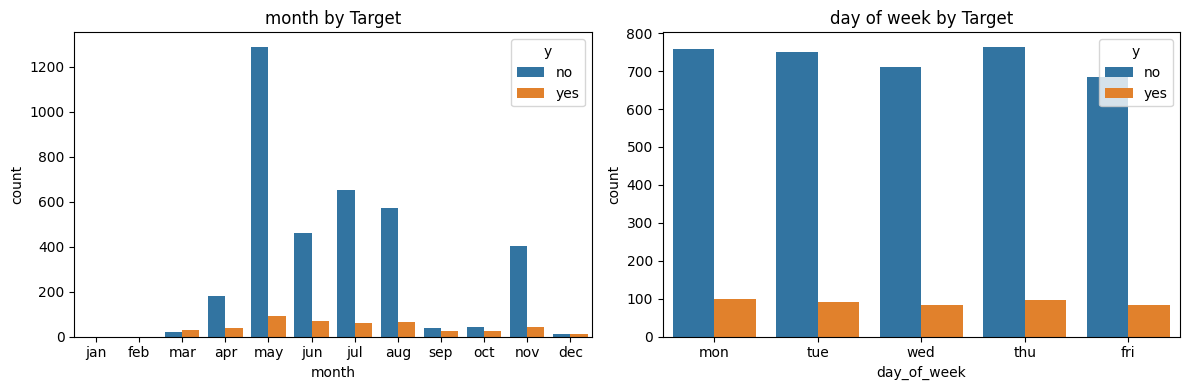

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

sns.countplot(x='month', hue='y', data=df)
plt.title('month by Target')

plt.subplot(1, 2, 2)
sns.countplot(x='day_of_week', hue='y', data=df)
plt.title('day of week by Target')

plt.tight_layout()
plt.show()

In [24]:
# groupby month, day of week with target variable

df_agg = df.groupby(['month', 'day_of_week', 'y']).size().reset_index(name='count')

In [25]:
df_agg.head()

,month,day_of_week,y,count
0,jan,mon,no,0
1,jan,mon,yes,0
2,jan,tue,no,0
3,jan,tue,yes,0
4,jan,wed,no,0


In [26]:
fig = go.Figure()

for day in df_agg['day_of_week'].unique():
    data = df_agg[df_agg['day_of_week'] == day]
    fig.add_trace(go.Bar(x=data['month'], y=data['count'], name=day))

fig.update_layout(
    barmode='group',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Count'),
    title='Grouped Bar Chart of Month and Day of Week vs. Target (y)'
)

fig.show()

Duration column -

In [27]:
print(df.groupby('y')['duration'].describe())

      count       mean         std   min    25%    50%    75%     max
y                                                                    
no   3668.0  219.40976  198.256347   0.0   96.0  165.0  274.0  3253.0
yes   451.0  560.78714  411.537717  63.0  255.5  458.0  761.0  3643.0


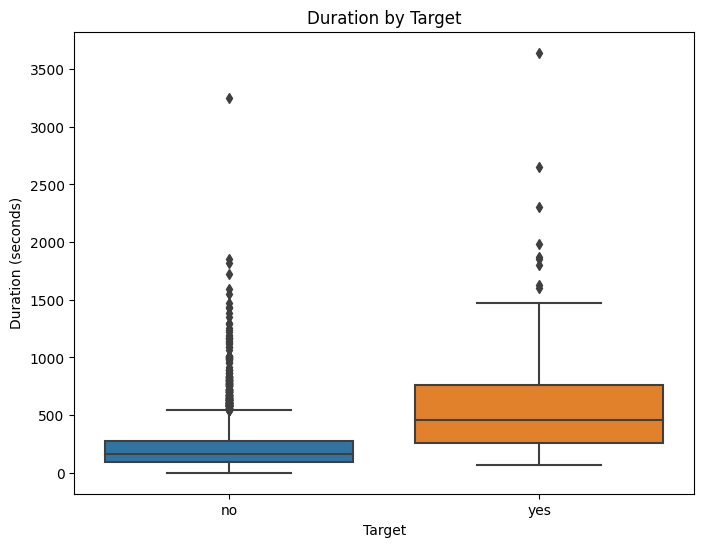

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Duration by Target')
plt.xlabel('Target')
plt.ylabel('Duration (seconds)')
plt.show()

In [29]:
from scipy import stats

duration_yes = df[df['y'] == 'yes']['duration']
duration_no = df[df['y'] == 'no']['duration']
t_stat, p_value = stats.ttest_ind(duration_yes, duration_no)

print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_value}')

# Check the significance level (usually 0.05)
alpha = 0.05
print("There is a significant difference between 'yes' and ' no' groups.") if p_value < alpha else print("There is no significant difference between 'yes' and 'no' groups.")

T-test statistic: 29.57185726364515
P-value: 1.902622447564083e-174
There is a significant difference between 'yes' and ' no' groups.


In [30]:
num_bins = 15 # You can adjust the number of bins as needed
df['duration_category'] = pd.qcut(df['duration'], q=num_bins, labels=False)

# contingency_table = pd.crosstab(df['y'], df['duration_category'])
# chi2, p, _, _= chi2_contingency(contingency_table)

# print(f'Chi-squared statistic: {chi2}')
# print(f'P-value: {p}')

# alpha = 0.05
# print("There is a significant relationship between 'y' and 'duration_category'.") if p < alpha else print("There is no significant relationship between 'y' and 'duration_category'.")

In [31]:
# cancel the duration column after benchmarking !!!

In [32]:
df['duration_category']

0       13
1       11
2        9
3        0
4        1
        ..
4114     1
4115     8
4116     1
4117    13
4118     7
Name: duration_category, Length: 4119, dtype: int64

Campaign column

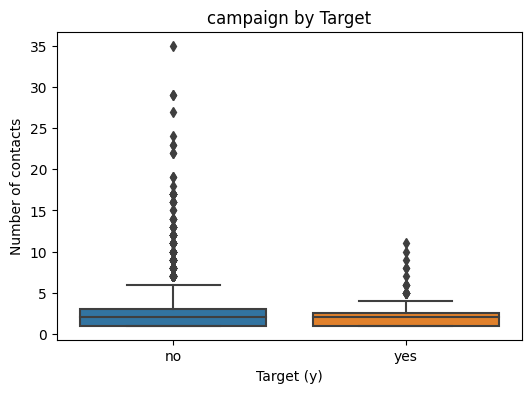

In [33]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='y', y='campaign', data=df)
plt.title(f'campaign by Target')
plt.xlabel('Target (y)')
plt.ylabel('Number of contacts')
plt.show()

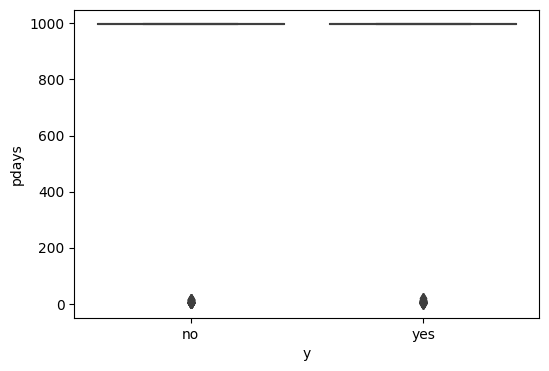

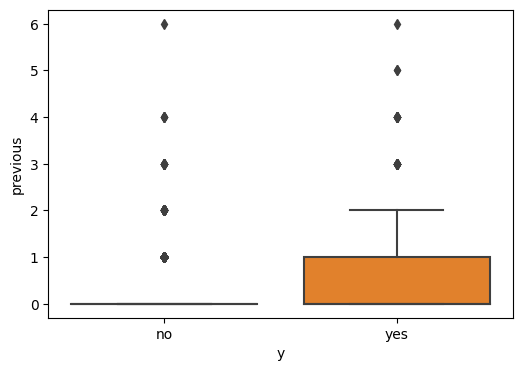

In [34]:
num_feat_01 = ['pdays', 'previous']

for f in num_feat_01:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=df['y'], y=df[f])
  plt.show()

In [35]:
df.month.value_counts()

may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
jan       0
feb       0
Name: month, dtype: int64

In [36]:
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0}).astype('int')
df['month_numeric'] = df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov':11, 'dec': 12 }).astype('int')

In [37]:
df['month_numeric']

0        5
1        5
2        6
3        6
4       11
        ..
4114     7
4115     7
4116     5
4117     8
4118    11
Name: month_numeric, Length: 4119, dtype: int64

## Pairplot - financial coeff

In [38]:
# sns.set(rc={"figure.figsize":(32, 12)})

# data_coeffs = ['month_numeric', 'emp.var.rate', 'cons.price.idx',  'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

# sns.pairplot(df[data_coeffs], hue="y")

# plt.show()

## Relacje pomiędzy zmiennymi w Data Frame

### Wartości numeryczne między sobą

In [39]:
numerical_features=[col for col in df.select_dtypes(include=['integer', 'float']).columns if col != 'y_numeric']
print(numerical_features)
print(len(numerical_features))
print(type(numerical_features))

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'duration_category', 'month_numeric']
12
<class 'list'>


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'duration'),
  Text(2.5, 0, 'campaign'),
  Text(3.5, 0, 'pdays'),
  Text(4.5, 0, 'previous'),
  Text(5.5, 0, 'emp.var.rate'),
  Text(6.5, 0, 'cons.price.idx'),
  Text(7.5, 0, 'cons.conf.idx'),
  Text(8.5, 0, 'euribor3m'),
  Text(9.5, 0, 'nr.employed'),
  Text(10.5, 0, 'duration_category'),
  Text(11.5, 0, 'month_numeric')])

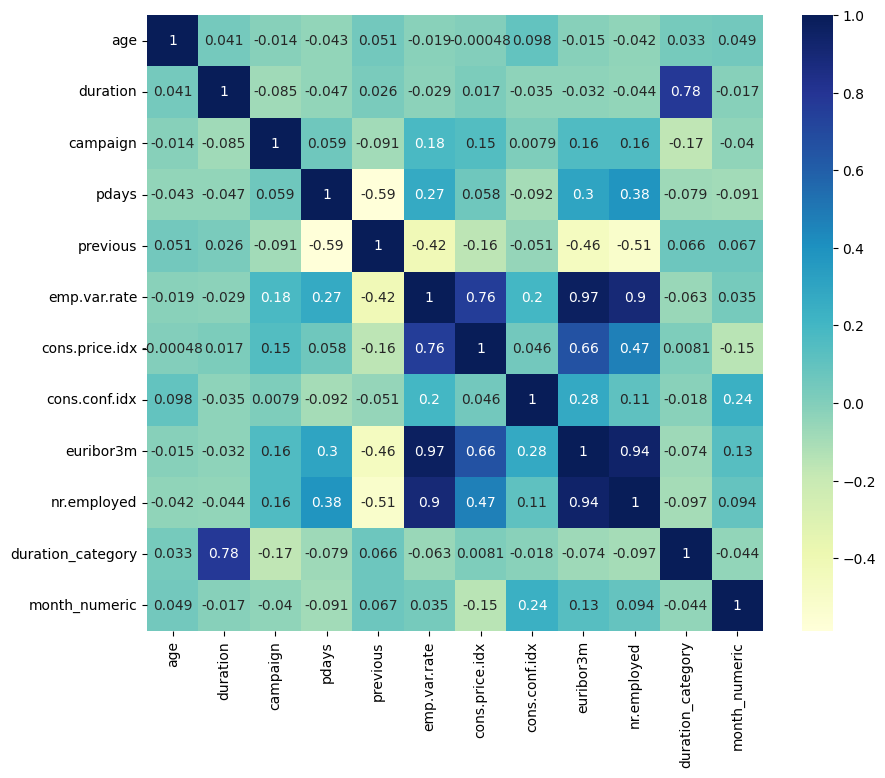

In [40]:
correlations=df[numerical_features].corr()
plt.figure(figsize=(10,8))

sns.heatmap(data=correlations,square=True,annot = True, cmap="YlGnBu")

plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [41]:
# Calculate and display PPS scores for all pairs of numeric variables
for var1 in numerical_features:
    for var2 in numerical_features:
        if var1 != var2:
            pps_score = pps.score(df, var1, var2)['ppscore']
            print(f'PPS Score between {var1} and {var2}: {pps_score:.2f}')

PPS Score between age and duration: 0.00
PPS Score between age and campaign: 0.00
PPS Score between age and pdays: 0.00
PPS Score between age and previous: 0.00
PPS Score between age and emp.var.rate: 0.00
PPS Score between age and cons.price.idx: 0.00
PPS Score between age and cons.conf.idx: 0.00
PPS Score between age and euribor3m: 0.00
PPS Score between age and nr.employed: 0.00
PPS Score between age and duration_category: 0.00
PPS Score between age and month_numeric: 0.00
PPS Score between duration and age: 0.00
PPS Score between duration and campaign: 0.00
PPS Score between duration and pdays: 0.00
PPS Score between duration and previous: 0.00
PPS Score between duration and emp.var.rate: 0.00
PPS Score between duration and cons.price.idx: 0.00
PPS Score between duration and cons.conf.idx: 0.00
PPS Score between duration and euribor3m: 0.00
PPS Score between duration and nr.employed: 0.00
PPS Score between duration and duration_category: 1.00
PPS Score between duration and month_nu

### Wartości numeryczne vs target column

In [42]:
df_copy = df.copy()

In [43]:
df_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_category,y_numeric,month_numeric
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,13,0,5
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,11,0,5
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,9,0,6
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,0,6
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,0,11


In [44]:
y_numeric = df_copy.pop('y_numeric')

In [45]:
X = df_copy
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_category,month_numeric
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,13,5
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,11,5
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,9,6
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,6
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,11


In [46]:
X[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4119 non-null   int64  
 1   duration           4119 non-null   int64  
 2   campaign           4119 non-null   int64  
 3   pdays              4119 non-null   int64  
 4   previous           4119 non-null   int64  
 5   emp.var.rate       4119 non-null   float64
 6   cons.price.idx     4119 non-null   float64
 7   cons.conf.idx      4119 non-null   float64
 8   euribor3m          4119 non-null   float64
 9   nr.employed        4119 non-null   float64
 10  duration_category  4119 non-null   int64  
 11  month_numeric      4119 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 386.3 KB


In [47]:
y_numeric.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: y_numeric
Non-Null Count  Dtype
--------------  -----
4119 non-null   int64
dtypes: int64(1)
memory usage: 32.3 KB


In [48]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_category,month_numeric
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,13,5
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,11,5
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,9,6
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,6
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,1,7
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,8,7
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,1,5
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,13,8


In [49]:
# sprawdzenie korelacji między zmiennymi numerycznymi a targetem ('y_numeric')
for f in numerical_features:
  print(f'\nFeature: {f}')
  print(stats.pointbiserialr(X[f], y_numeric))


Feature: age
SignificanceResult(statistic=0.060374082506977636, pvalue=0.00010569353749626029)

Feature: duration
SignificanceResult(statistic=0.4185653682346244, pvalue=1.9026224475643572e-174)

Feature: campaign
SignificanceResult(statistic=-0.07609088294850745, pvalue=1.0131007149573394e-06)

Feature: pdays
SignificanceResult(statistic=-0.3320115339486591, pvalue=1.442855865352259e-106)

Feature: previous
SignificanceResult(statistic=0.25569662959028744, pvalue=1.725690840999725e-62)

Feature: emp.var.rate
SignificanceResult(statistic=-0.2832156765328247, pvalue=7.822982265332988e-77)

Feature: cons.price.idx
SignificanceResult(statistic=-0.09832603241628189, pvalue=2.5500558703296847e-10)

Feature: cons.conf.idx
SignificanceResult(statistic=0.05439301829399087, pvalue=0.0004786306153979258)

Feature: euribor3m
SignificanceResult(statistic=-0.2985649713595469, pvalue=1.4082264365897354e-85)

Feature: nr.employed
SignificanceResult(statistic=-0.3492412340486664, pvalue=1.84212732949

Wszsytkie zmienne mają wpływ (o róznym stopniu)  na z,ienna objaśnianą i jest onstatystycznie istotny.

## Wizualizacja danych kategorycznych

In [50]:
categorical_features = [col for col in df.select_dtypes(include=['object', 'category']).columns if col != 'y']
print(categorical_features)
print(len(categorical_features))
print(type(categorical_features))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
10
<class 'list'>


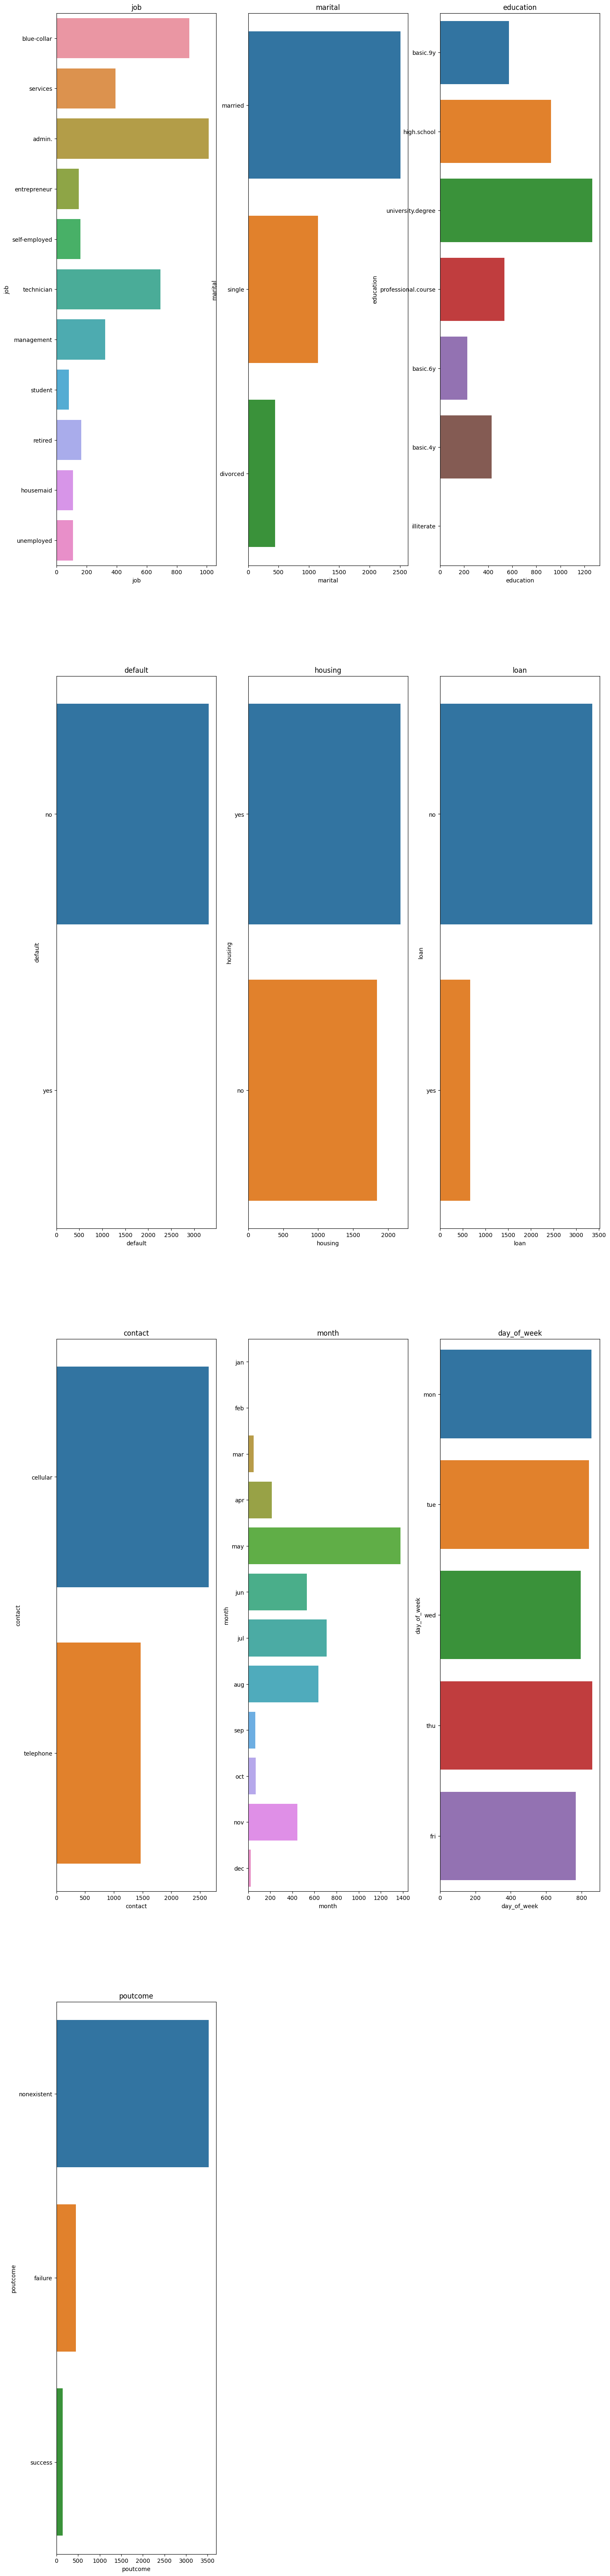

In [51]:
plt.figure(figsize=(17, 80), facecolor='white')
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(4, 3, plotnumber)
    sns.countplot(y=categorical_feature, data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber += 1
plt.show()

### Sprawdzenie relacji między zmiennymi kategorycznymi oraz targetem za pomconą Information gain w decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

target_col = 'y'
target = df[target_col]

df_cat_feat = df[categorical_features]

df_encoded = pd.get_dummies(df_cat_feat, columns=categorical_features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')  # Information Gain criterion
clf.fit(X_train, y_train)

# Get feature importances (information gain)
feature_importance = clf.feature_importances_

# Create a dictionary mapping features to their importance
feature_importance_dict = dict(zip(df_encoded.columns, feature_importance))

# Sort the feature-importance dictionary by information gain
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Print the sorted feature-importance pairs
for feature, info_gain in sorted_feature_importance.items():
    print(f"Feature: {feature}, Information Gain: {info_gain:.4f}")

Feature: poutcome_success, Information Gain: 0.1044
Feature: housing_yes, Information Gain: 0.0729
Feature: day_of_week_wed, Information Gain: 0.0533
Feature: loan_yes, Information Gain: 0.0496
Feature: job_technician, Information Gain: 0.0449
Feature: day_of_week_thu, Information Gain: 0.0436
Feature: day_of_week_tue, Information Gain: 0.0408
Feature: day_of_week_fri, Information Gain: 0.0378
Feature: marital_single, Information Gain: 0.0348
Feature: job_management, Information Gain: 0.0338
Feature: month_jun, Information Gain: 0.0324
Feature: month_may, Information Gain: 0.0295
Feature: marital_married, Information Gain: 0.0293
Feature: contact_telephone, Information Gain: 0.0276
Feature: education_university.degree, Information Gain: 0.0275
Feature: month_aug, Information Gain: 0.0260
Feature: job_blue-collar, Information Gain: 0.0254
Feature: education_high.school, Information Gain: 0.0253
Feature: month_nov, Information Gain: 0.0244
Feature: job_services, Information Gain: 0.0216


In summary, the results suggest that 'poutcome_success',  certain day-of-the-week, housing-related, loan features are the most influential in predicting the target variable 'y'.It is possible to use this information to prioritize feature selection or further investigate the relationships between these features and the target variable in your dataset.

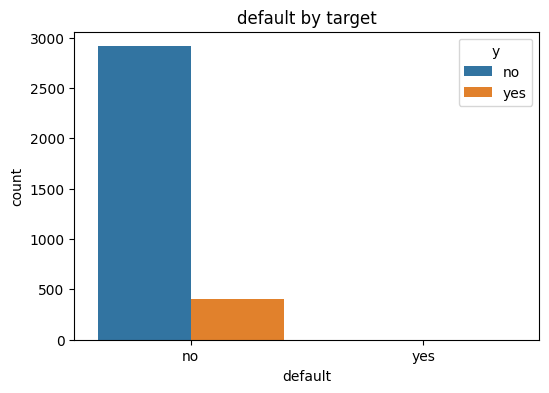

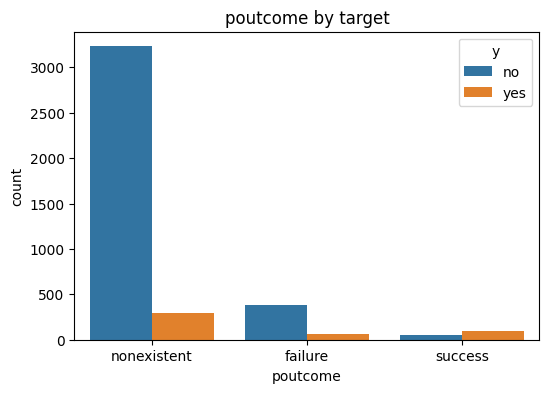

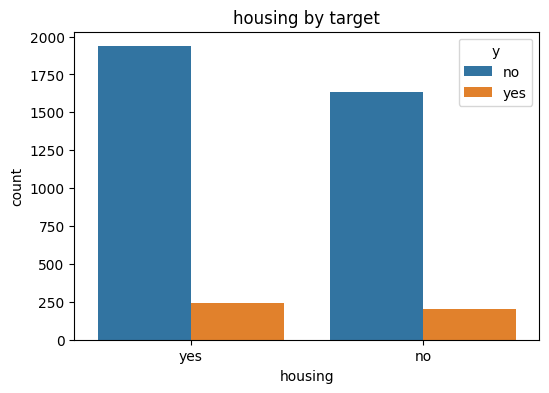

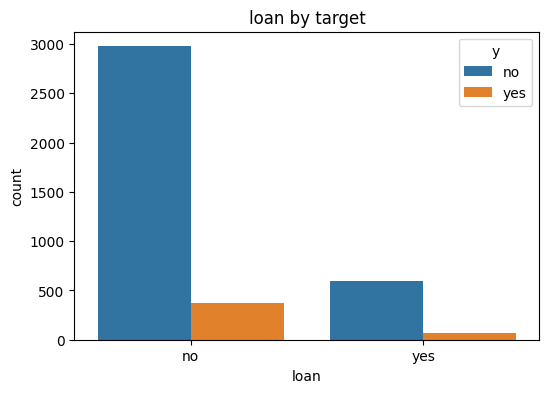

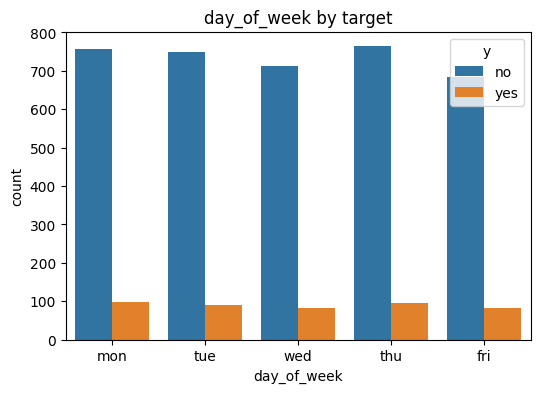

In [53]:
cat_features_vis = ['default', 'poutcome', 'housing', 'loan', 'day_of_week']

for f in cat_features_vis:
  plt.figure(figsize=(6, 4), facecolor='white')
  sns.countplot(x=f, hue='y', data=df)
  print()
  plt.title(f'{f} by target')

## analiza współczynników społecznych / ekonomicznych emp.var.rate', 'cons.price.idx',  'cons.conf.idx', 'euribor3m', 'nr.employed' - dodanie zmiennej year

zmiana wartości euribor na koszyki

In [54]:
# Calculate the minimum and maximum values from the DataFrame
min_value_eur = df['euribor3m'].min()
max_value_eur = df['euribor3m'].max()

# Define the bin width
bin_width = 0.5

# # Create a list of bin edges (start, stop, and step)
# bins = [x for x in range(int(min_value_eur), int(max_value_eur) + 1, int(bin_width))]

# # Create a new column with the bin labels
# df['euribor3m_binned'] = pd.cut(df['euribor3m'], bins=bins, labels=bins[:-1])

# Create a list of bin edges (start, stop, and step) using numpy.arange
bins = np.arange(int(min_value_eur), int(max_value_eur) + bin_width, bin_width)

bins = np.linspace(int(min_value_eur), max_value_eur, num_bins + 1)

# Create a new column with the bin labels
df['euribor3m_binned'] = pd.cut(df['euribor3m'], bins=bins, labels=bins[:-1])

In [55]:
print(df['euribor3m_binned'])
print(df['euribor3m'])

0       1.009000
1       4.708667
2       4.708667
3       4.708667
4       4.036000
          ...   
4114    4.708667
4115    4.708667
4116    1.345333
4117    4.708667
4118    4.036000
Name: euribor3m_binned, Length: 4119, dtype: category
Categories (15, float64): [0.000000 < 0.336333 < 0.672667 < 1.009000 ... 3.699667 < 4.036000 < 4.372333 <
                           4.708667]
0       1.313
1       4.855
2       4.962
3       4.959
4       4.191
        ...  
4114    4.958
4115    4.959
4116    1.354
4117    4.966
4118    4.120
Name: euribor3m, Length: 4119, dtype: float64


In [56]:
len(df['euribor3m_binned'].unique())

10

In [57]:
numerical_features.append('euribor3m_binned')

In [58]:
for column in df[numerical_features]:
    unique_values = df[column].unique()
    print(f"Unique values in column {column}: {', '.join(map(str, unique_values))}")

Unique values in column age: 30, 39, 25, 38, 47, 32, 41, 31, 35, 36, 29, 27, 44, 46, 45, 50, 55, 40, 28, 34, 33, 51, 48, 20, 76, 56, 24, 58, 60, 37, 52, 42, 49, 54, 59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64, 74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70
Unique values in column duration: 487, 346, 227, 17, 58, 128, 290, 44, 68, 170, 301, 148, 97, 211, 553, 698, 191, 59, 38, 849, 326, 222, 626, 119, 388, 479, 446, 127, 109, 113, 393, 151, 256, 42, 525, 57, 499, 84, 137, 31, 430, 126, 340, 412, 132, 79, 341, 157, 252, 263, 215, 89, 143, 40, 10, 481, 233, 204, 403, 180, 16, 447, 81, 361, 1091, 395, 432, 596, 77, 768, 96, 357, 459, 11, 264, 93, 374, 158, 95, 835, 505, 300, 390, 274, 135, 257, 268, 477, 91, 76, 103, 436, 483, 250, 259, 389, 7, 123, 92, 297, 406, 104, 854, 147, 203, 149, 144, 394, 523, 73, 197, 108, 80, 114, 122, 1161, 181, 239, 360, 314, 984, 663, 141, 706, 797, 311, 63, 111, 49, 171, 242, 279, 246, 309, 168, 153, 152, 90, 117, 640, 

In [59]:
columns_coeff = ['emp.var.rate', 'cons.price.idx',  'cons.conf.idx', 'euribor3m', 'nr.employed', 'euribor3m_binned']

value_mappings = {}

for column in df[columns_coeff]:
    unique_values = df[column].unique()
    value_mapping = {value: i + 1 for i, value in enumerate(unique_values)}
    value_mappings[column] = value_mapping

for column in df[columns_coeff]:
    new_column_name = f"{column}_updated"
    df[new_column_name] = df[column].map(value_mappings[column])

print(df)

      age          job  marital          education default housing loan  \
0      30  blue-collar  married           basic.9y      no     yes   no   
1      39     services   single        high.school      no      no   no   
2      25     services  married        high.school      no     yes   no   
3      38     services  married           basic.9y      no     NaN  NaN   
4      47       admin.  married  university.degree      no     yes   no   
...   ...          ...      ...                ...     ...     ...  ...   
4114   30       admin.  married           basic.6y      no     yes  yes   
4115   39       admin.  married        high.school      no     yes   no   
4116   27      student   single        high.school      no      no   no   
4117   58       admin.  married        high.school      no      no   no   
4118   34   management   single        high.school      no     yes   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
0      cellular   may    

In [60]:
# przyporządkowanie roku wierszom na bazie innych danych - 'euribor3m' oraz kolumny 'month' i reszty istniejących kolumn

In [61]:
df['year'] = pd.np.where(df['euribor3m'] > 2.892, '2008', pd.np.where(df['euribor3m'] > 1.05, '2009' , 'others'))

In [62]:
conditions = [
    (df['euribor3m'] > 2.892),
    (df['euribor3m'] > 1.05),
    (df['month_numeric'] == 12),
    ((df['month_numeric'] >= 3) & (df['month_numeric'] <= 6)),
    ((df['month_numeric'] == 7) & (df['nr.employed_updated'] == 7)), # wybieramy lipiec 2009 z wszystkich danych lipcowych
    ((df['month_numeric'] == 8) & (df['nr.employed_updated'] == 7)),
    ((df['month_numeric'] == 9) & (df['nr.employed_updated'] == 9)),
    ((df['month_numeric'] == 10) & (df['nr.employed_updated'] == 9)),
    ((df['month_numeric'] == 11) & (df['nr.employed_updated'] == 9))
]
choices = ['2008', '2009', '2009', '2010', '2009', '2009','2009', '2009', '2009']

df['year'] = pd.np.select(conditions, choices, default='2010')

In [63]:
# dtale.show(df)

### visualization column results for variable 'y' (0/1 binary column) with distribution in month (feature) and year (feature) on 1 chart.

In [64]:
df.groupby(['year', 'month_numeric'])['y_numeric'].count().unstack()

month_numeric,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,
2008,NaN,NaN,758.0,431.0,667.0,528.0,NaN,6.0,386.0,1.0
2009,25.0,201.0,597.0,75.0,14.0,75.0,25.0,43.0,36.0,21.0
2010,23.0,14.0,23.0,24.0,30.0,33.0,39.0,20.0,24.0,NaN


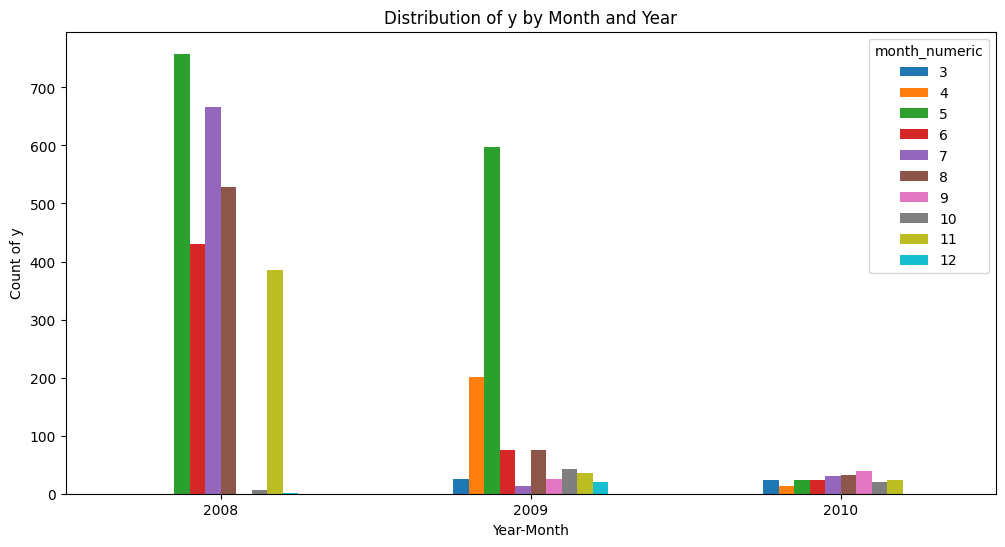

In [65]:
result = df.groupby(['year', 'month_numeric'])['y'].count().unstack(fill_value=0)

# Plot the results as a bar chart
result.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of y by Month and Year')
plt.xlabel('Year-Month')
plt.ylabel('Count of y')
plt.legend(title='month_numeric')
plt.xticks(rotation=0)
plt.show()


In [66]:
result = df.groupby(['year', 'y'])['y'].count().unstack(fill_value=0)
result

y,no,yes
year,,
2008,2643,134
2009,913,199
2010,112,118


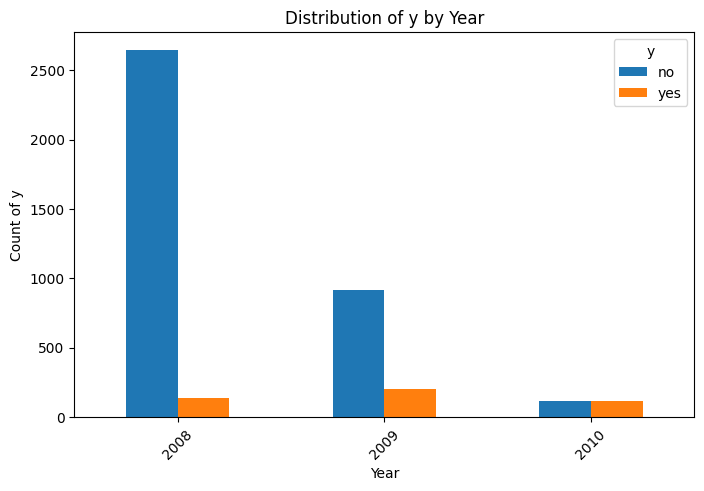

In [67]:
result = df.groupby(['year', 'y'])['y'].count().unstack(fill_value=0)

# Create a list of labels with year below each group of months
x_labels = [f"{year}" for (year) in result.index]

# Plot the results as a bar chart
fig, ax = plt.subplots(figsize=(8, 5))  # Extend the width of the chart
result.plot(kind='bar', ax=ax)

# Set x-axis labels (grouping months by year)
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)

plt.title('Distribution of y by Year')
plt.xlabel('Year')
plt.ylabel('Count of y')
plt.legend(title='y')
plt.xticks(rotation=45)
plt.show()

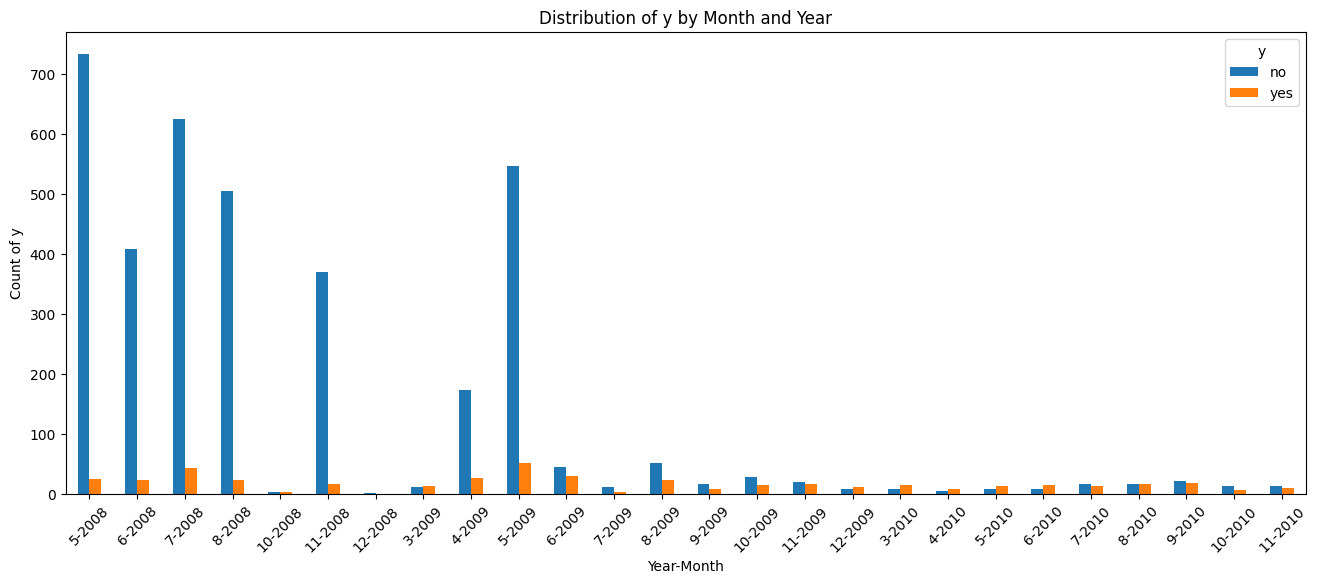

In [68]:
result = df.groupby(['year', 'month_numeric', 'y'])['y'].count().unstack(fill_value=0)

# Create a list of labels with year below each group of months
x_labels = [f"{month}-{year}" for (year, month) in result.index]

# Plot the results as a bar chart
fig, ax = plt.subplots(figsize=(16, 6))  # Extend the width of the chart
result.plot(kind='bar', ax=ax)

# Set x-axis labels (grouping months by year)
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)

plt.title('Distribution of y by Month and Year')
plt.xlabel('Year-Month')
plt.ylabel('Count of y')
plt.legend(title='y')
plt.xticks(rotation=45)
plt.show()

Widzimy, że zmienna y jest zupełnie odmniennie rozłożona w poszczególnych latach przy różnej ilości próbek w każdym z lat.

In [69]:
df['month_object'] = df['month'].astype(str)

In [70]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_category,y_numeric,month_numeric,euribor3m_binned,emp.var.rate_updated,cons.price.idx_updated,cons.conf.idx_updated,euribor3m_updated,nr.employed_updated,euribor3m_binned_updated,year,month_object
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,13,0,5,1.009000,1,1,1,1,1,1.0,2009,may
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,11,0,5,4.708667,2,2,2,2,2,2.0,2008,may
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,9,0,6,4.708667,3,3,3,3,3,2.0,2008,jun
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,0,6,4.708667,3,3,3,4,3,2.0,2008,jun
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,0,11,4.036000,4,4,4,5,4,3.0,2008,nov


In [71]:
# łączenie kolumn month and w jedną kolumnę
df['month_year'] = df['month_object'] + '_' + df['year'].astype('str')
df['month_year'] = df['month_year'].astype('category')

In [72]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_category,y_numeric,month_numeric,euribor3m_binned,emp.var.rate_updated,cons.price.idx_updated,cons.conf.idx_updated,euribor3m_updated,nr.employed_updated,euribor3m_binned_updated,year,month_object,month_year
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,13,0,5,1.009000,1,1,1,1,1,1.0,2009,may,may_2009
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,11,0,5,4.708667,2,2,2,2,2,2.0,2008,may,may_2008
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,9,0,6,4.708667,3,3,3,3,3,2.0,2008,jun,jun_2008
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,0,6,4.708667,3,3,3,4,3,2.0,2008,jun,jun_2008
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,0,11,4.036000,4,4,4,5,4,3.0,2008,nov,nov_2008


# Data Preprocessing

## Wartości null

In [73]:
# Łącznie mamy 1029 wierszy z wartościami null (niektóre w kilku kolumnach)
# Dla 5 kolumn kategorycznych  wartości nulls są zdecydowaną mniejszością (od 1% od 4% wierszy) - dla nich uzupełnię nulle wartością najczęście spotykaną
# dla Kolumny 'default' aż 803 rekordy (19%) stanowią wartości null - z uwagi na to, przekształcę nulls jako odrębną wartość ('unknown'), kolumna ze względu na strukturę

In [74]:
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)

In [75]:
df.isnull().sum()

age                           0
job                           0
marital                       0
education                     0
default                     803
housing                       0
loan                          0
contact                       0
month                         0
day_of_week                   0
duration                      0
campaign                      0
pdays                         0
previous                      0
poutcome                      0
emp.var.rate                  0
cons.price.idx                0
cons.conf.idx                 0
euribor3m                     0
nr.employed                   0
y                             0
duration_category             0
y_numeric                     0
month_numeric                 0
euribor3m_binned              0
emp.var.rate_updated          0
cons.price.idx_updated        0
cons.conf.idx_updated         0
euribor3m_updated             0
nr.employed_updated           0
euribor3m_binned_updated      0
year    

Strukura kolumny 'default', nie pozwala jej wziąć do modelowania

In [76]:
df['default'].value_counts()

no     3315
yes       1
Name: default, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       4119 non-null   int64   
 1   job                       4119 non-null   object  
 2   marital                   4119 non-null   object  
 3   education                 4119 non-null   object  
 4   default                   3316 non-null   object  
 5   housing                   4119 non-null   object  
 6   loan                      4119 non-null   object  
 7   contact                   4119 non-null   object  
 8   month                     4119 non-null   category
 9   day_of_week               4119 non-null   category
 10  duration                  4119 non-null   int64   
 11  campaign                  4119 non-null   int64   
 12  pdays                     4119 non-null   int64   
 13  previous                  4119 non-null   int64 

## Podział danych na zbiór treningowy i testowy

In [78]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_category,y_numeric,month_numeric,euribor3m_binned,emp.var.rate_updated,cons.price.idx_updated,cons.conf.idx_updated,euribor3m_updated,nr.employed_updated,euribor3m_binned_updated,year,month_object,month_year
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,13,0,5,1.009000,1,1,1,1,1,1.0,2009,may,may_2009
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,11,0,5,4.708667,2,2,2,2,2,2.0,2008,may,may_2008
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,9,0,6,4.708667,3,3,3,3,3,2.0,2008,jun,jun_2008
3,38,services,married,basic.9y,no,yes,no,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,0,6,4.708667,3,3,3,4,3,2.0,2008,jun,jun_2008
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,0,11,4.036000,4,4,4,5,4,3.0,2008,nov,nov_2008


In [79]:
# # kopia zestawu danych
# data = df.copy()
# data.head()

* bez kolumny 'default',
* w liście zapisane zmienne zmienne do modelowania

## Zestaw danych nr 1

Wszystkie zmienne początkowe


In [80]:
model_columns = ['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
      'y_numeric']

print(len(model_columns))
print(model_columns)

19
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_numeric']


In [81]:
data = df[model_columns]
y = data.pop('y_numeric')
y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y_numeric, Length: 4119, dtype: int64

In [82]:
X = data
X.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,yes,no,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4119 non-null   int64   
 1   job             4119 non-null   object  
 2   marital         4119 non-null   object  
 3   education       4119 non-null   object  
 4   housing         4119 non-null   object  
 5   loan            4119 non-null   object  
 6   contact         4119 non-null   object  
 7   month           4119 non-null   category
 8   day_of_week     4119 non-null   category
 9   campaign        4119 non-null   int64   
 10  pdays           4119 non-null   int64   
 11  previous        4119 non-null   int64   
 12  poutcome        4119 non-null   object  
 13  emp.var.rate    4119 non-null   float64 
 14  cons.price.idx  4119 non-null   float64 
 15  cons.conf.idx   4119 non-null   float64 
 16  euribor3m       4119 non-null   float64 
 17  nr.employed   

Przy liście zmiennych pomijamy zmienną 'duration' - specyfika tej zmiennej jest taka, nie będziemy wiedzieli przed wykonaniem konaktu, jak długo potrwa (nie będzie dostępna w danych produkcyjnych)

In [84]:
num_feat = [col for col in df[model_columns].select_dtypes(include=['integer', 'float']).columns if col != 'y_numeric']

cat_feat = [col for col in df[model_columns].select_dtypes(include=['object']).columns if col != 'y']

ord_feat = [col for col in df[model_columns].select_dtypes(include=['category']).columns if col != 'y']

print(f'No. of numerical features: {len(num_feat)}')
print(num_feat)
print()
print(f'No. of categorical features: {len(cat_feat)}')
print(cat_feat)
print()
print(f'No. of ordinal features: {len(ord_feat)}')
print(ord_feat)

No. of numerical features: 9
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

No. of categorical features: 7
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

No. of ordinal features: 2
['month', 'day_of_week']


In [85]:
seed = 23

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [87]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3295, 18), (3295,), (824, 18), (824,))

In [88]:
y_train.value_counts()

0    2934
1     361
Name: y_numeric, dtype: int64

In [89]:
361 / (2934+361)

0.10955993930197269

In [90]:
y_test.value_counts()

0    734
1     90
Name: y_numeric, dtype: int64

### Feature Importance - RandomForestClassifier() - Zestaw danych nr 1

In [91]:
categorical_transformer = Pipeline(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, cat_feat),
        ('ordinal', ordinal_transformer, ord_feat)
    ]
)

rfc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rfc_model', RandomForestClassifier(random_state=seed))])

In [92]:
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('label_encoder',
                                                                   <__main__.LabelEncoderTransformer object at 0x7b1051820610>)]),
                                                  ['month', 'day_of_week'])])),
                ('rfc_model', RandomForestClassifier(random_state=23))])

In [93]:
feature_importance = rfc_pipeline.steps[-1][1].feature_importances_
all_column_names = X_train.columns

importance_tuples = [(col, imp) for col, imp in zip(all_column_names, feature_importance)]

# Sort the list by feature importance in descending order
rfc_pre_sorted_importance = sorted(importance_tuples, key=lambda x: x[1], reverse=True)

# Print feature importance values for each column in descending order
print('Random Forest Feature Importance: \n')
for column, importance in rfc_pre_sorted_importance:
    print(f" {column}: {importance}")

Random Forest Feature Importance: 

 age: 0.0268677584108947
 poutcome: 0.025710206691869675
 nr.employed: 0.024363048548194467
 emp.var.rate: 0.02428816364519069
 campaign: 0.02416070739269782
 month: 0.01751885007002464
 previous: 0.01726601742629355
 housing: 0.016861064168508327
 cons.price.idx: 0.01682548211672266
 job: 0.016700213012565614
 euribor3m: 0.01509328610188216
 loan: 0.014197137471708523
 pdays: 0.01143889857022313
 day_of_week: 0.01107454530846042
 cons.conf.idx: 0.009423281621242379
 contact: 0.00886578907181938
 marital: 0.007176347141683523
 education: 0.006912994859478684


## Zestaw danych nr 2

z nowo stworzoną zmienną month_year oraz wybranym 1 z 5 wskaźników finansowych  wuagi na ich wysoką kolerację i wspólne zależności (ppsscore) )

In [94]:
model_columns_2 = ['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome',
       'month_year', 'y_numeric']

print(len(model_columns_2))
print(model_columns_2)

14
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'month_year', 'y_numeric']


In [95]:
data_2 = df[model_columns_2]

In [96]:
y_2 = data_2.pop('y_numeric')
y_2

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y_numeric, Length: 4119, dtype: int64

In [97]:
X_2 = data_2
X_2.head()

,age,job,marital,education,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,month_year
0,30,blue-collar,married,basic.9y,yes,no,cellular,fri,2,999,0,nonexistent,may_2009
1,39,services,single,high.school,no,no,telephone,fri,4,999,0,nonexistent,may_2008
2,25,services,married,high.school,yes,no,telephone,wed,1,999,0,nonexistent,jun_2008
3,38,services,married,basic.9y,yes,no,telephone,fri,3,999,0,nonexistent,jun_2008
4,47,admin.,married,university.degree,yes,no,cellular,mon,1,999,0,nonexistent,nov_2008


In [98]:
num_feat_2 = [col for col in df[model_columns_2].select_dtypes(include=['integer', 'float']).columns if col != 'y_numeric']
cat_feat_2 = [col for col in df[model_columns_2].select_dtypes(include=['object']).columns if col != 'y']
ord_feat_2 = [col for col in df[model_columns_2].select_dtypes(include=['category']).columns if col != 'y']
print(f'No. of numerical features: {len(num_feat_2)}')
print(num_feat_2)
print()
print(f'No. of categorical features: {len(cat_feat_2)}')
print(cat_feat_2)
print()
print(f'No. of ordinal features: {len(ord_feat_2)}')
print(ord_feat_2)

No. of numerical features: 4
['age', 'campaign', 'pdays', 'previous']

No. of categorical features: 7
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

No. of ordinal features: 2
['day_of_week', 'month_year']


In [99]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=seed, stratify=y)

In [100]:
X_train_2.shape, y_train_2.shape, X_test_2.shape, y_test_2.shape

((3295, 13), (3295,), (824, 13), (824,))

In [101]:
y_train_2.value_counts()

0    2934
1     361
Name: y_numeric, dtype: int64

In [102]:
361 / (2934+361)

0.10955993930197269

In [103]:
y_test_2.value_counts()

0    734
1     90
Name: y_numeric, dtype: int64

In [104]:
90 / (734+90)

0.10922330097087378

### Feature Importance - RandomForestClassifier() - Zestaw danych nr 2

In [105]:
categorical_transformer = Pipeline(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, cat_feat_2),
        ('ordinal', ordinal_transformer, ord_feat_2)
    ]
)

rfc_pipeline_2 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rfc_model_2', RandomForestClassifier(random_state=seed))])

In [106]:
rfc_pipeline_2.fit(X_train_2, y_train_2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('label_encoder',
                                                                   <__main__.LabelEncoderTransformer object at 0x7b104d0f8a90>)]),
                                                  ['day_of_week',
                                                   'month_year'])])),
                ('rfc_model_2', RandomForestClassifier(random_state=23))])

In [107]:
feature_importance = rfc_pipeline_2.steps[-1][1].feature_importances_
all_column_names = X_train_2.columns

importance_tuples = [(col, imp) for col, imp in zip(all_column_names, feature_importance)]

# Sort the list by feature importance in descending order
rfc_pre_sorted_importance = sorted(importance_tuples, key=lambda x: x[1], reverse=True)

# Print feature importance values for each column in descending order
print('Random Forest Feature Importance - zestaw danych 2: \n')
for column, importance in rfc_pre_sorted_importance:
    print(f" {column}: {importance}")

Random Forest Feature Importance - zestaw danych 2: 

 age: 0.02591324001424403
 pdays: 0.02250008347873538
 month_year: 0.022331282777275828
 day_of_week: 0.015419510063230417
 poutcome: 0.015312653130634067
 job: 0.015078911783612783
 housing: 0.015031408708265508
 loan: 0.013982861894174145
 previous: 0.010637547511346697
 campaign: 0.009908147031313225
 contact: 0.007912279402230486
 marital: 0.0066016848640053985
 education: 0.006427581316993075


In [108]:
# stop

## Zestaw danych 3

-  pozostawiono 2 zmienne społeczono - ekonomiczne wybrane ze względu na ich istotnoś

In [109]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_category,y_numeric,month_numeric,euribor3m_binned,emp.var.rate_updated,cons.price.idx_updated,cons.conf.idx_updated,euribor3m_updated,nr.employed_updated,euribor3m_binned_updated,year,month_object,month_year
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,13,0,5,1.009000,1,1,1,1,1,1.0,2009,may,may_2009
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,11,0,5,4.708667,2,2,2,2,2,2.0,2008,may,may_2008
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,9,0,6,4.708667,3,3,3,3,3,2.0,2008,jun,jun_2008
3,38,services,married,basic.9y,no,yes,no,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,0,6,4.708667,3,3,3,4,3,2.0,2008,jun,jun_2008
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,0,11,4.036000,4,4,4,5,4,3.0,2008,nov,nov_2008


In [110]:
model_columns_3 = ['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'emp.var.rate',
        'y_numeric']

print(len(model_columns_3))
print(model_columns_3)

15
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'cons.price.idx', 'emp.var.rate', 'y_numeric']


In [111]:
data_3 = df[model_columns_3]

y_3 = data_3.pop('y_numeric')
y_3

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y_numeric, Length: 4119, dtype: int64

In [112]:
X_3 = data_3
X_3.head()

,age,job,marital,education,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,emp.var.rate
0,30,blue-collar,married,basic.9y,yes,no,cellular,fri,2,999,0,nonexistent,92.893,-1.8
1,39,services,single,high.school,no,no,telephone,fri,4,999,0,nonexistent,93.994,1.1
2,25,services,married,high.school,yes,no,telephone,wed,1,999,0,nonexistent,94.465,1.4
3,38,services,married,basic.9y,yes,no,telephone,fri,3,999,0,nonexistent,94.465,1.4
4,47,admin.,married,university.degree,yes,no,cellular,mon,1,999,0,nonexistent,93.200,-0.1


In [113]:
num_feat_3 = [col for col in df[model_columns_3].select_dtypes(include=['integer', 'float']).columns if col != 'y_numeric']
cat_feat_3 = [col for col in df[model_columns_3].select_dtypes(include=['object']).columns if col != 'y']
ord_feat_3 = [col for col in df[model_columns_3].select_dtypes(include=['category']).columns if col != 'y']
print(f'No. of numerical features: {len(num_feat_3)}')
print(num_feat_3)
print()
print(f'No. of categorical features: {len(cat_feat_3)}')
print(cat_feat_3)
print()
print(f'No. of ordinal features: {len(ord_feat_3)}')
print(ord_feat_3)

No. of numerical features: 6
['age', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'emp.var.rate']

No. of categorical features: 7
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

No. of ordinal features: 1
['day_of_week']


In [114]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=seed, stratify=y)

X_train_3.shape, y_train_3.shape, X_test_3.shape, y_test_3.shape

((3295, 14), (3295,), (824, 14), (824,))

In [115]:
print(y_train_3.value_counts())

0    2934
1     361
Name: y_numeric, dtype: int64


In [116]:
print(y_test_3.value_counts())

0    734
1     90
Name: y_numeric, dtype: int64


### Feature Importance - RandomForestClassifier() - Zestaw danych nr 3

In [117]:
categorical_transformer = Pipeline(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, cat_feat_3),
        ('ordinal', ordinal_transformer, ord_feat_3)
    ]
)

rfc_pipeline_3 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rfc_model_3', RandomForestClassifier(random_state=seed))])

In [118]:
rfc_pipeline_3.fit(X_train_3, y_train_3)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('label_encoder',
                                                                   <__main__.LabelEncoderTransformer object at 0x7b1046b7feb0>)]),
                                                  ['day_of_week'])])),
                ('rfc_model_3', RandomForestClassifier(random_state=23))])

In [119]:
feature_importance = rfc_pipeline_3.steps[-1][1].feature_importances_
all_column_names = X_train_3.columns

importance_tuples = [(col, imp) for col, imp in zip(all_column_names, feature_importance)]

# Sort the list by feature importance in descending order
rfc_pre_sorted_importance = sorted(importance_tuples, key=lambda x: x[1], reverse=True)

# Print feature importance values for each column in descending order
print('Random Forest Feature Importance - zestaw danych 3: \n')
for column, importance in rfc_pre_sorted_importance:
    print(f" {column}: {importance}")

Random Forest Feature Importance - zestaw danych 3: 

 cons.price.idx: 0.03132364119198049
 age: 0.02940677443863823
 emp.var.rate: 0.027917938421509275
 pdays: 0.027483925364259608
 day_of_week: 0.022761682449104183
 poutcome: 0.020637265364473033
 housing: 0.019740528960391798
 job: 0.019644676228490775
 loan: 0.017943547078002352
 previous: 0.01625659927162782
 campaign: 0.013580765610059447
 contact: 0.012528370097061464
 marital: 0.009672139145979641
 education: 0.00920825244378747


## Zestaw danych 4

- mix 2 i 3 zestawu - month_year zostawiony +  pozostawiono 2 zmienne społeczono - ekonomiczne wybrane ze względu na ich istotność

In [120]:
model_columns_4 = ['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'emp.var.rate', 'month_year',
        'y_numeric']

print(len(model_columns_4))
print(model_columns_4)

16
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'cons.price.idx', 'emp.var.rate', 'month_year', 'y_numeric']


In [121]:
data_4 = df[model_columns_4]


In [122]:
y_4 = data_4.pop('y_numeric')

In [123]:
X_4 = data_4

In [124]:
num_feat_4 = [col for col in df[model_columns_4].select_dtypes(include=['integer', 'float']).columns if col != 'y_numeric']
cat_feat_4 = [col for col in df[model_columns_4].select_dtypes(include=['object']).columns if col != 'y']
ord_feat_4 = [col for col in df[model_columns_4].select_dtypes(include=['category']).columns if col != 'y']

print(f'No. of numerical features: {len(num_feat_4)}')
print(num_feat_4)
print()
print(f'No. of categorical features: {len(cat_feat_4)}')
print(cat_feat_4)
print()
print(f'No. of ordinal features: {len(ord_feat_4)}')
print(ord_feat_4)

No. of numerical features: 6
['age', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'emp.var.rate']

No. of categorical features: 7
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

No. of ordinal features: 2
['day_of_week', 'month_year']


In [125]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=seed, stratify=y)

In [126]:
print()

print(X_train_4.shape, y_train_4.shape, X_test_4.shape, y_test_4.shape)

y_train_4.value_counts()

y_test_4.value_counts()


(3295, 15) (3295,) (824, 15) (824,)


0    734
1     90
Name: y_numeric, dtype: int64

### Feature Importance - RandomForestClassifier() - Zestaw danych nr 4

In [127]:
categorical_transformer = Pipeline(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, cat_feat_3),
        ('ordinal', ordinal_transformer, ord_feat_3)
    ]
)

rfc_pipeline_4 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rfc_model_4', RandomForestClassifier(random_state=seed))])

In [128]:
rfc_pipeline_4.fit(X_train_4, y_train_4)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('label_encoder',
                                                                   <__main__.LabelEncoderTransformer object at 0x7b1046a01390>)]),
                                                  ['day_of_week'])])),
                ('rfc_model_4', RandomForestClassifier(random_state=23))])

In [129]:
feature_importance = rfc_pipeline_4.steps[-1][1].feature_importances_
all_column_names = X_train_4.columns

importance_tuples = [(col, imp) for col, imp in zip(all_column_names, feature_importance)]

# Sort the list by feature importance in descending order
rfc_pre_sorted_importance = sorted(importance_tuples, key=lambda x: x[1], reverse=True)

# Print feature importance values for each column in descending order
print('Random Forest Feature Importance - zestaw danych 4: \n')
for column, importance in rfc_pre_sorted_importance:
    print(f" {column}: {importance}")

Random Forest Feature Importance - zestaw danych 4: 

 cons.price.idx: 0.03132364119198049
 age: 0.02940677443863823
 emp.var.rate: 0.027917938421509275
 pdays: 0.027483925364259608
 day_of_week: 0.022761682449104183
 poutcome: 0.020637265364473033
 housing: 0.019740528960391798
 job: 0.019644676228490775
 month_year: 0.01867623425431555
 loan: 0.017943547078002352
 previous: 0.01625659927162782
 campaign: 0.013580765610059447
 contact: 0.012528370097061464
 marital: 0.009672139145979641
 education: 0.00920825244378747


In [130]:
# stop

## Zestaw danych 5 - oversampling

*   na bazie podziału na nowo utworzonej kolumnie 'year', zrobimy oversampling dla danych z 2009 i 2010r. (2008 bez zmian) dal wszsytkich danych zaliczonych do datatype (poza 'year')




In [131]:
model_columns_sampling = ['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'emp.var.rate', 'month', 'year',
      'y_numeric']

print(len(model_columns_sampling))
print(model_columns_sampling)

17
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'cons.price.idx', 'emp.var.rate', 'month', 'year', 'y_numeric']


In [132]:
df_sampling = df[model_columns_sampling]
df_sampling.shape

(4119, 17)

In [133]:
df_sampling['year'] = df_sampling['year'].astype('int')

In [134]:
df_sampling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4119 non-null   int64   
 1   job             4119 non-null   object  
 2   marital         4119 non-null   object  
 3   education       4119 non-null   object  
 4   housing         4119 non-null   object  
 5   loan            4119 non-null   object  
 6   contact         4119 non-null   object  
 7   day_of_week     4119 non-null   category
 8   campaign        4119 non-null   int64   
 9   pdays           4119 non-null   int64   
 10  previous        4119 non-null   int64   
 11  poutcome        4119 non-null   object  
 12  cons.price.idx  4119 non-null   float64 
 13  emp.var.rate    4119 non-null   float64 
 14  month           4119 non-null   category
 15  year            4119 non-null   int64   
 16  y_numeric       4119 non-null   int64   
dtypes: category(2)

In [135]:
cat_feat_sampling = [col for col in df_sampling.select_dtypes(include=['object', 'category']).columns]
cat_feat_sampling

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'day_of_week',
 'poutcome',
 'month']

In [136]:
df_encoded = pd.get_dummies(df_sampling, columns=cat_feat_sampling)

df_encoded.shape

(4119, 55)

In [137]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   campaign                       4119 non-null   int64  
 2   pdays                          4119 non-null   int64  
 3   previous                       4119 non-null   int64  
 4   cons.price.idx                 4119 non-null   float64
 5   emp.var.rate                   4119 non-null   float64
 6   year                           4119 non-null   int64  
 7   y_numeric                      4119 non-null   int64  
 8   job_admin.                     4119 non-null   uint8  
 9   job_blue-collar                4119 non-null   uint8  
 10  job_entrepreneur               4119 non-null   uint8  
 11  job_housemaid                  4119 non-null   uint8  
 12  job_management                 4119 non-null   u

In [138]:
df_2008 = df_encoded[df_sampling['year'] == 2008]
print(df_2008.shape)
df_2009_2010 = df_encoded[df_sampling['year'].isin([2009, 2010])]
print(df_2009_2010.shape)

(2777, 55)
(1342, 55)


In [139]:
from imblearn.over_sampling import RandomOverSampler

X_2009_2010 = df_2009_2010.drop(columns=['y_numeric'])
y_2009_2010 = df_2009_2010['y_numeric']

# Inicjalizacja RandomOverSampler
ros = RandomOverSampler(sampling_strategy={0: 1025*2, 1: 317*2}, random_state=seed) # podniesienie ilości obserwacji dwurkotnie z zachowaniem proprocji między etykietami

# Zastosowanie RandomOverSampler do X i y
X_resampled, y_resampled = ros.fit_resample(X_2009_2010, y_2009_2010)

df_resampled = pd.DataFrame(data=X_resampled, columns=X_2009_2010.columns)
df_resampled['y_numeric'] = y_resampled

df_oversampled = pd.concat([df_2008, df_resampled], ignore_index=True)

In [140]:
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2777 entries, 1 to 4118
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            2777 non-null   int64  
 1   campaign                       2777 non-null   int64  
 2   pdays                          2777 non-null   int64  
 3   previous                       2777 non-null   int64  
 4   cons.price.idx                 2777 non-null   float64
 5   emp.var.rate                   2777 non-null   float64
 6   year                           2777 non-null   int64  
 7   y_numeric                      2777 non-null   int64  
 8   job_admin.                     2777 non-null   uint8  
 9   job_blue-collar                2777 non-null   uint8  
 10  job_entrepreneur               2777 non-null   uint8  
 11  job_housemaid                  2777 non-null   uint8  
 12  job_management                 2777 non-null   u

In [141]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684 entries, 0 to 2683
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            2684 non-null   int64  
 1   campaign                       2684 non-null   int64  
 2   pdays                          2684 non-null   int64  
 3   previous                       2684 non-null   int64  
 4   cons.price.idx                 2684 non-null   float64
 5   emp.var.rate                   2684 non-null   float64
 6   year                           2684 non-null   int64  
 7   job_admin.                     2684 non-null   uint8  
 8   job_blue-collar                2684 non-null   uint8  
 9   job_entrepreneur               2684 non-null   uint8  
 10  job_housemaid                  2684 non-null   uint8  
 11  job_management                 2684 non-null   uint8  
 12  job_retired                    2684 non-null   u

In [142]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5461 entries, 0 to 5460
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            5461 non-null   int64  
 1   campaign                       5461 non-null   int64  
 2   pdays                          5461 non-null   int64  
 3   previous                       5461 non-null   int64  
 4   cons.price.idx                 5461 non-null   float64
 5   emp.var.rate                   5461 non-null   float64
 6   year                           5461 non-null   int64  
 7   y_numeric                      5461 non-null   int64  
 8   job_admin.                     5461 non-null   uint8  
 9   job_blue-collar                5461 non-null   uint8  
 10  job_entrepreneur               5461 non-null   uint8  
 11  job_housemaid                  5461 non-null   uint8  
 12  job_management                 5461 non-null   u

In [143]:
df.groupby(['year', 'y_numeric'])['y_numeric'].count().unstack(fill_value=0)

y_numeric,0,1
year,,
2008,2643,134
2009,913,199
2010,112,118


In [144]:
df_resampled.groupby(['year', 'y_numeric'])['y_numeric'].count().unstack(fill_value=0)

y_numeric,0,1
year,,
2009,1817,399
2010,233,235


In [145]:
df_oversampled.groupby(['year', 'y_numeric'])['y_numeric'].count().unstack(fill_value=0)

y_numeric,0,1
year,,
2008,2643,134
2009,1817,399
2010,233,235


In [146]:
# x_labels = [f"{month}" for (year) in result.index]

# # Plot the results as a bar chart
# fig, ax = plt.subplots(figsize=(8, 5))  # Extend the width of the chart
# result.plot(kind='bar', ax=ax)

# # Set x-axis labels (grouping months by year)
# ax.set_xticks(range(len(x_labels)))
# ax.set_xticklabels(x_labels)

# plt.title('Distribution of y by Year')
# plt.xlabel('Year')
# plt.ylabel('Count of y')
# plt.legend(title='y')
# plt.xticks(rotation=45)
# plt.show()

In [147]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5461 entries, 0 to 5460
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            5461 non-null   int64  
 1   campaign                       5461 non-null   int64  
 2   pdays                          5461 non-null   int64  
 3   previous                       5461 non-null   int64  
 4   cons.price.idx                 5461 non-null   float64
 5   emp.var.rate                   5461 non-null   float64
 6   year                           5461 non-null   int64  
 7   y_numeric                      5461 non-null   int64  
 8   job_admin.                     5461 non-null   uint8  
 9   job_blue-collar                5461 non-null   uint8  
 10  job_entrepreneur               5461 non-null   uint8  
 11  job_housemaid                  5461 non-null   uint8  
 12  job_management                 5461 non-null   u

In [148]:
cat_feat_sampling

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'day_of_week',
 'poutcome',
 'month']

In [149]:
# for cat in cat_feat_sampling:
#   categories = df[cat].unique().tolist()

In [150]:

# category = []

# for column in cat_feat_sampling:
#     unique_category = df[column].stack().unique()

#     # Dla każdej unikalnej kategorii przypisz ją jako nazwę zmiennej
#     for category in unique_category:
#         variable = f"{column}_{category}"
#         category.append(variable)

In [151]:
# job_category = df_oversampled['job'].unique().tolist()
# job_category

In [152]:
# marital_category = df['marital'].unique().tolist()
# marital_category

In [153]:
# education_category = df['education'].unique().tolist()
# education_category

In [154]:
# housing_category = df['housing'].unique().tolist()
# housing_category

In [155]:
# contact_category = df['contact'].unique().tolist()
# contact_category

In [156]:
# loan_category = df['loan'].unique().tolist()
# loan_category

In [157]:
# day_of_week_category = df['day_of_week'].unique().tolist()
# day_of_week_category

In [158]:
# poutcome_category = df['poutcome'].unique().tolist()
# poutcome_category

In [159]:
# month_category = df['month'].unique().tolist()
# month_category

In [160]:
categories = []

for column in df_oversampled.columns:

    patterns = ["job_", "marital_", "housing_", "education_", "contact_", "loan_", "day_of_week_", "poutcome_", "month_"]

    for pattern in patterns:
        if pattern in column:
            categories.append(column)

In [161]:
patterns = ["job_", "marital_", "housing_", 'education_', 'contact_', 'loan_', 'day_of_week_', 'poutcome_', 'month_']

In [162]:
categories

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_mon',
 'day_of_week_tue',
 'day_of_week_wed',
 'day_of_week_thu',
 'day_of_week_fri',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'month_jan',
 'month_feb',
 'month_mar',
 'month_apr',
 'month_may',
 'month_jun',
 'month_jul',
 'month_aug',
 'month_sep',
 'month_oct',
 'month_nov',
 'month_dec']

In [163]:
job_categories = []
marital_categories = []
housing_categories = []
education_categories = []
contact_categories = []
loan_categories = []
day_of_week_categories = []
poutcome_categories = []
month_categories = []

# Iteruj przez 'categories' i podziel na kategorie na podstawie wzorców
for category in categories:
    for pattern in patterns:
        if category.startswith(pattern):
            if pattern == "job_":
                job_categories.append(category)
            elif pattern == "marital_":
                marital_categories.append(category)
            elif pattern == "housing_":
                housing_categories.append(category)
            elif pattern == "education_":
                education_categories.append(category)
            elif pattern == "contact_":
                contact_categories.append(category)
            elif pattern == "loan_":
                loan_categories.append(category)
            elif pattern == "day_of_week_":
                day_of_week_categories.append(category)
            elif pattern == "poutcome_":
                poutcome_categories.append(category)
            elif pattern == "month_":
                month_categories.append(category)


In [164]:
print(contact_categories)
print(loan_categories)

['contact_cellular', 'contact_telephone']
['loan_no', 'loan_yes']


In [165]:
print(month_categories)

['month_jan', 'month_feb', 'month_mar', 'month_apr', 'month_may', 'month_jun', 'month_jul', 'month_aug', 'month_sep', 'month_oct', 'month_nov', 'month_dec']


In [166]:
# job_category_df_oversampled

In [167]:
# Odtwórz oryginalne kategorie na podstawie kolumn numerycznych
df_oversampled['job'] = df_oversampled[job_categories].idxmax(axis=1)
df_oversampled['marital'] = df_oversampled[marital_categories].idxmax(axis=1)
df_oversampled['housing'] = df_oversampled[housing_categories].idxmax(axis=1)
df_oversampled['education'] = df_oversampled[education_categories].idxmax(axis=1)
df_oversampled['contact'] = df_oversampled[contact_categories].idxmax(axis=1)
df_oversampled['loan'] = df_oversampled[loan_categories].idxmax(axis=1)
df_oversampled['day_of_week'] = df_oversampled[day_of_week_categories].idxmax(axis=1)
df_oversampled['poutcome'] = df_oversampled[poutcome_categories].idxmax(axis=1)
df_oversampled['month'] = df_oversampled[month_categories].idxmax(axis=1)
# Odtwórz pozostałe oryginalne kategorie


df_oversampled['marital'] = df_oversampled[marital_categories].idxmax(axis=1)
df_oversampled['housing'] = df_oversampled[housing_categories].idxmax(axis=1)
df_oversampled['education'] = df_oversampled[education_categories].idxmax(axis=1)
df_oversampled['contact'] = df_oversampled[contact_categories].idxmax(axis=1)
df_oversampled['loan'] = df_oversampled[loan_categories].idxmax(axis=1)
df_oversampled['day_of_week'] = df_oversampled[day_of_week_categories].idxmax(axis=1)
df_oversampled['poutcome'] = df_oversampled[poutcome_categories].idxmax(axis=1)
df_oversampled['month'] = df_oversampled[month_categories].idxmax(axis=1)

# # Usuń kolumny numeryczne
df_oversampled = df_oversampled.drop(columns=job_categories)
df_oversampled = df_oversampled.drop(columns=marital_categories)
df_oversampled = df_oversampled.drop(columns=housing_categories)
df_oversampled = df_oversampled.drop(columns=education_categories)
df_oversampled = df_oversampled.drop(columns=contact_categories)
df_oversampled = df_oversampled.drop(columns=loan_categories)
df_oversampled = df_oversampled.drop(columns=day_of_week_categories)
df_oversampled = df_oversampled.drop(columns=poutcome_categories)
df_oversampled = df_oversampled.drop(columns=month_categories)
# Usuń pozostałe kolumny numeryczne

# Teraz DataFrame df_oversampled ma oryginalne kategorie
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5461 entries, 0 to 5460
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5461 non-null   int64  
 1   campaign        5461 non-null   int64  
 2   pdays           5461 non-null   int64  
 3   previous        5461 non-null   int64  
 4   cons.price.idx  5461 non-null   float64
 5   emp.var.rate    5461 non-null   float64
 6   year            5461 non-null   int64  
 7   y_numeric       5461 non-null   int64  
 8   job             5461 non-null   object 
 9   marital         5461 non-null   object 
 10  housing         5461 non-null   object 
 11  education       5461 non-null   object 
 12  contact         5461 non-null   object 
 13  loan            5461 non-null   object 
 14  day_of_week     5461 non-null   object 
 15  poutcome        5461 non-null   object 
 16  month           5461 non-null   object 
dtypes: float64(2), int64(6), object(9

In [168]:
df_oversampled[cat_feat_sampling]

,job,marital,education,housing,loan,contact,day_of_week,poutcome,month
0,job_services,marital_single,education_high.school,housing_no,loan_no,contact_telephone,day_of_week_fri,poutcome_nonexistent,month_may
1,job_services,marital_married,education_high.school,housing_yes,loan_no,contact_telephone,day_of_week_wed,poutcome_nonexistent,month_jun
2,job_services,marital_married,education_basic.9y,housing_yes,loan_no,contact_telephone,day_of_week_fri,poutcome_nonexistent,month_jun
3,job_admin.,marital_married,education_university.degree,housing_yes,loan_no,contact_cellular,day_of_week_mon,poutcome_nonexistent,month_nov
4,job_entrepreneur,marital_married,education_university.degree,housing_yes,loan_no,contact_cellular,day_of_week_mon,poutcome_nonexistent,month_nov
...,...,...,...,...,...,...,...,...,...
5456,job_admin.,marital_single,education_university.degree,housing_no,loan_no,contact_cellular,day_of_week_fri,poutcome_success,month_sep
5457,job_student,marital_single,education_basic.9y,housing_yes,loan_no,contact_cellular,day_of_week_tue,poutcome_nonexistent,month_mar
5458,job_services,marital_single,education_university.degree,housing_yes,loan_no,contact_cellular,day_of_week_mon,poutcome_success,month_oct
5459,job_technician,marital_married,education_professional.course,housing_no,loan_no,contact_cellular,day_of_week_thu,poutcome_nonexistent,month_apr


In [169]:
df_oversampled['job'] = df_oversampled['job'].str.replace('job_', '')
df_oversampled['job']

0           services
1           services
2           services
3             admin.
4       entrepreneur
            ...     
5456          admin.
5457         student
5458        services
5459      technician
5460          admin.
Name: job, Length: 5461, dtype: object

In [170]:
df_oversampled['marital'] = df_oversampled['marital'].str.replace('marital_', '')
df_oversampled['marital']

0        single
1       married
2       married
3       married
4       married
         ...   
5456     single
5457     single
5458     single
5459    married
5460    married
Name: marital, Length: 5461, dtype: object

In [171]:
df_oversampled['housing'] = df_oversampled['housing'].str.replace('housing_', '')
df_oversampled['housing']

0        no
1       yes
2       yes
3       yes
4       yes
       ... 
5456     no
5457    yes
5458    yes
5459     no
5460    yes
Name: housing, Length: 5461, dtype: object

In [172]:
df_oversampled['education'] = df_oversampled['education'].str.replace('education_', '')
df_oversampled['education']

0               high.school
1               high.school
2                  basic.9y
3         university.degree
4         university.degree
               ...         
5456      university.degree
5457               basic.9y
5458      university.degree
5459    professional.course
5460      university.degree
Name: education, Length: 5461, dtype: object

In [173]:
df_oversampled['contact'] = df_oversampled['contact'].str.replace('contact_', '')
df_oversampled['contact']


0       telephone
1       telephone
2       telephone
3        cellular
4        cellular
          ...    
5456     cellular
5457     cellular
5458     cellular
5459     cellular
5460     cellular
Name: contact, Length: 5461, dtype: object

In [174]:
df_oversampled['loan'] = df_oversampled['loan'].str.replace('loan_', '')
df_oversampled['loan']

0       no
1       no
2       no
3       no
4       no
        ..
5456    no
5457    no
5458    no
5459    no
5460    no
Name: loan, Length: 5461, dtype: object

In [175]:
df_oversampled['month'] = df_oversampled['month'].str.replace('month_', '')
df_oversampled['month']

0       may
1       jun
2       jun
3       nov
4       nov
       ... 
5456    sep
5457    mar
5458    oct
5459    apr
5460    may
Name: month, Length: 5461, dtype: object

In [176]:
df_oversampled['day_of_week'] = df_oversampled['day_of_week'].str.replace('day_of_week_', '')
df_oversampled['day_of_week']

0       fri
1       wed
2       fri
3       mon
4       mon
       ... 
5456    fri
5457    tue
5458    mon
5459    thu
5460    tue
Name: day_of_week, Length: 5461, dtype: object

In [177]:
df_oversampled['month_year'] = df_oversampled['month'] + '_' + df_oversampled['year'].astype('str')

In [178]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5461 entries, 0 to 5460
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5461 non-null   int64  
 1   campaign        5461 non-null   int64  
 2   pdays           5461 non-null   int64  
 3   previous        5461 non-null   int64  
 4   cons.price.idx  5461 non-null   float64
 5   emp.var.rate    5461 non-null   float64
 6   year            5461 non-null   int64  
 7   y_numeric       5461 non-null   int64  
 8   job             5461 non-null   object 
 9   marital         5461 non-null   object 
 10  housing         5461 non-null   object 
 11  education       5461 non-null   object 
 12  contact         5461 non-null   object 
 13  loan            5461 non-null   object 
 14  day_of_week     5461 non-null   object 
 15  poutcome        5461 non-null   object 
 16  month           5461 non-null   object 
 17  month_year      5461 non-null   o

In [179]:
df_oversampled.drop(columns='month', inplace=True)

In [180]:
df_oversampled['month_year'] = df_oversampled['month_year'].astype('category')
df_oversampled['day_of_week'] = df_oversampled['day_of_week'].astype('category')

In [181]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5461 entries, 0 to 5460
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             5461 non-null   int64   
 1   campaign        5461 non-null   int64   
 2   pdays           5461 non-null   int64   
 3   previous        5461 non-null   int64   
 4   cons.price.idx  5461 non-null   float64 
 5   emp.var.rate    5461 non-null   float64 
 6   year            5461 non-null   int64   
 7   y_numeric       5461 non-null   int64   
 8   job             5461 non-null   object  
 9   marital         5461 non-null   object  
 10  housing         5461 non-null   object  
 11  education       5461 non-null   object  
 12  contact         5461 non-null   object  
 13  loan            5461 non-null   object  
 14  day_of_week     5461 non-null   category
 15  poutcome        5461 non-null   object  
 16  month_year      5461 non-null   category
dtypes: category(2)

### Przygotowanie do modelowania

In [182]:
model_columns_5 = ['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'emp.var.rate', 'month_year',
      'y_numeric']

print(len(model_columns_5))
print(model_columns_5)

16
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'cons.price.idx', 'emp.var.rate', 'month_year', 'y_numeric']


In [183]:
data_5 = df_oversampled[model_columns_5]

In [184]:
y_5 = data_5.pop('y_numeric')
X_5 = data_5

In [185]:
y_5.shape

(5461,)

In [186]:
X_5.shape

(5461, 15)

In [187]:
num_feat_5 = [col for col in df_oversampled[model_columns_5].select_dtypes(include=['integer', 'float']).columns if col != 'y_numeric']
cat_feat_5 = [col for col in df_oversampled[model_columns_5].select_dtypes(include=['object']).columns if col != 'y']
ord_feat_5 = [col for col in df_oversampled[model_columns_5].select_dtypes(include=['category']).columns if col != 'y']

print(f'No. of numerical features: {len(num_feat_5)}')
print(num_feat_5)
print()
print(f'No. of categorical features: {len(cat_feat_5)}')
print(cat_feat_5)
print()
print(f'No. of ordinal features: {len(ord_feat_5)}')
print(ord_feat_5)

No. of numerical features: 6
['age', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'emp.var.rate']

No. of categorical features: 7
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

No. of ordinal features: 2
['day_of_week', 'month_year']


In [188]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=seed, stratify=y_5)

In [189]:
print(X_train_5.shape, y_train_5.shape, X_test_5.shape, y_test_5.shape)

(4368, 15) (4368,) (1093, 15) (1093,)


In [190]:
y_train_5.value_counts()

0    3754
1     614
Name: y_numeric, dtype: int64

In [191]:
614 / (3754+614)

0.14056776556776557

In [192]:
y_test_5.value_counts()

0    939
1    154
Name: y_numeric, dtype: int64

In [193]:
154 / (939 + 154)

0.14089661482159194

In [194]:
stop

NameError: ignored

#Modelowanie

Realtywnie największy wpływ przy każdym sprawdzeniu mają mają kolumny:

*

## Baseline Random Forest Classifier - zestaw 1

Komentarz do baseline

In [ ]:
X_test_data = X_test
y_test_data = y_test

In [ ]:
sns.set(rc={"figure.figsize":(8, 6)})
calculation_metrics(rfc_pipeline, 'Model 0 - Baseline RFC')

In [ ]:
# # test

# model_names = metrics_dataframe['Model']w
# auc_scores = metrics_dataframe['AUC']

# # Create a plot for AUC ROC
# plt.figure(figsize=(10, 6))
# for model_name, auc_score in zip(model_names, auc_scores):
#     # You need to replace the following lines with the actual data and models
#     fpr, tpr, thresholds = roc_curve(y_test_data, predictions_proba)  # Replace with actual data
#     plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()

In [ ]:
# stop

## Model 1 - Logistic Regression zestaw danych 1


* z użyciem zestawu danych nr 1 wraz SMOTE (oversampling danych - przeciwdziałanie niezbalansowaniu - widoczny słabe wyniki prognozy w mniej licznej klasie) - dodanie również StandardScaler() - celem jest sprawdzenie feature importance dla wskaźników finansowych


In [ ]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat),
        ('ordinal_transformer', ordinal_transformer, ord_feat),
        ('numeric_transformer', numeric_transformer, num_feat)
    ]
)

lr_pipeline = Pipeline_imb(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=seed)),
                              ('lr_model', LogisticRegression(random_state=seed))])

In [ ]:
lr_param_grid = {
    'smote__sampling_strategy': [0.3],
    'smote__k_neighbors': [4],
    'lr_model__C': [ 0.01],
    'lr_model__penalty': ['l2'],
    'lr_model__max_iter': [15],
}

In [ ]:
lr_model_gridsearch = HalvingGridSearchCV(estimator = lr_pipeline,
                                       param_grid = lr_param_grid,
                                       scoring='f1_weighted',
                                      #  error_score='raise',
                                       cv=10,
                                       verbose=1,
                                       n_jobs=-1,
                                       random_state=seed,
                                       refit=True)

lr_model_gridsearch.fit(X_train, y_train)

In [ ]:
print('\nBest hyperparameter:', lr_model_gridsearch.best_params_)

In [ ]:
lr_model = lr_model_gridsearch.best_estimator_

In [ ]:
X_test_data = X_test
y_test_data = y_test

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(lr_model, 'Model 1 - Logistic Regression - dataset 1')

In [ ]:
# stop

### Sprawdzenie istotności cech na bazie Regresji Logistycznej - zestaw 1

In [ ]:
training_features = list(model_columns)
training_features.remove('y_numeric')

In [ ]:
training_features

In [ ]:
calculate_and_print_feature_importance(lr_model, training_features)

In [ ]:
# stop

## Model 1_b Logistic Regression zestaw 1 - bez SMOTE dla porównania

In [ ]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat),
        ('ordinal_transformer', ordinal_transformer, ord_feat),
        ('numeric_transformer', numeric_transformer, num_feat)
    ]
)

lr_pipeline_1a = Pipeline_imb(steps=[('preprocessor', preprocessor),
                              ('lr_model', LogisticRegression(random_state=seed))])

In [ ]:
lr_param_grid_1a = {
    'lr_model__C': [0.001, 0.01, 0.1],
    'lr_model__penalty': ['l1', 'l2', 'none'],
    'lr_model__max_iter': [15, 25, 50],
}

In [ ]:
lr_model_gridsearch_1a = HalvingGridSearchCV(estimator = lr_pipeline_1a,
                                       param_grid = lr_param_grid_1a,
                                       scoring='f1_weighted',
                                      #  error_score='raise',
                                       cv=10,
                                       verbose=1,
                                       n_jobs=-1,
                                       random_state=seed,
                                       refit=True)

lr_model_gridsearch_1a.fit(X_train, y_train)

In [ ]:
print('\nBest hyperparameter:', lr_model_gridsearch_1a.best_params_)

In [ ]:
lr_model_1a = lr_model_gridsearch_1a.best_estimator_

In [ ]:
X_test_data = X_test
y_test_data = y_test

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(lr_model_1a, 'Model 1_A - Logistic Regression - dataset 1')

Widać, że predykcja jest o wiele słabsza dla mniejszej klasy w 'y_numeric' bez użycia SMOTE

In [ ]:
# Model 2 - Logistic Regression zestaw 2

# * z kolumną year oraz wybranym najważniejszym

## Model 2 - Logistic Regression zestaw danych 2

In [ ]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_2),
        ('ordinal_transformer', ordinal_transformer, ord_feat_2),
        ('numeric_transformer', numeric_transformer, num_feat_2)
    ]
)

lr_pipeline_2 = Pipeline_imb(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=seed)),
                              ('lr_model_2', LogisticRegression(random_state=seed))])

In [ ]:
lr_param_grid_2 = {
    'smote__sampling_strategy': [0.3,],
    'smote__k_neighbors': [4],
    'lr_model_2__C': [ 0.01,],
    'lr_model_2__penalty': ['l2'],
    'lr_model_2__max_iter': [15,],
}

In [ ]:
lr_model_2_gridsearch = HalvingGridSearchCV(estimator = lr_pipeline_2,
                                       param_grid = lr_param_grid_2,
                                       scoring='f1_weighted',
                                       cv=10,
                                       verbose=1,
                                       n_jobs=-1,
                                       random_state=seed,
                                       refit=True)

lr_model_2_gridsearch.fit(X_train_2, y_train_2)

In [ ]:
print('\nBest hyperparameter:', lr_model_2_gridsearch.best_params_)

In [ ]:
lr_model_2 = lr_model_2_gridsearch.best_estimator_

In [ ]:
X_test_data = X_test_2
y_test_data = y_test_2

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(lr_model_2, 'Model 2 - Logistic Regression - dataset 2')

### Istotność cech Logistic Regression zestaw danych 2

In [ ]:
training_features_2 = list(model_columns_2)
training_features_2.remove('y_numeric')
training_features_2

In [ ]:
calculate_and_print_feature_importance(lr_model_2, training_features_2)

In [ ]:
# stop

## Model 3 - Logistic Regression zestaw danych 3

In [ ]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_3),
        ('ordinal_transformer', ordinal_transformer, ord_feat_3),
        ('numeric_transformer', numeric_transformer, num_feat_3)
    ]
)

lr_pipeline_3 = Pipeline_imb(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=seed)),
                              ('lr_model_3', LogisticRegression(random_state=seed))])

In [ ]:
lr_param_grid_3 = {
    'smote__sampling_strategy': [0.8],
    'smote__k_neighbors': [5],
    # 'lr_model__solver': ['liblinear', 'lbfgs', 'newton-cholesky'], wynik był lepszy w wersji z automatycznym 'lbfgs'
    'lr_model_3__C': [0.01],
    'lr_model_3__penalty': [ 'l2'],
    'lr_model_3__max_iter': [15],
}

In [ ]:
lr_model_3_gridsearch = HalvingGridSearchCV(estimator = lr_pipeline_3,
                                       param_grid = lr_param_grid_3,
                                       scoring='f1_weighted',
                                       cv=10,
                                       verbose=1,
                                       n_jobs=-1,
                                       random_state=seed,
                                       refit=True)

lr_model_3_gridsearch.fit(X_train_3, y_train_3)

In [ ]:
print('\nBest hyperparameter:', lr_model_3_gridsearch.best_params_)

In [ ]:
lr_model_3 = lr_model_3_gridsearch.best_estimator_

In [ ]:
# X_test_data
# y_test_data

In [ ]:
X_test_data = X_test_3
y_test_data = y_test_3

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(lr_model_3, 'Model 3 - Logistic Regression - dataset 3')

In [ ]:
# stop

### Istotność cech Logistic Regression zestaw 3

In [ ]:
training_features_3 = list(model_columns_3)
training_features_3.remove('y_numeric')
training_features_3

In [ ]:
calculate_and_print_feature_importance(lr_model_3, training_features_3)

## Model 4 - Support Vector Machines() - zestaw 1

In [ ]:
data.head()

In [ ]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

svm_pipeline = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat),
        ('ordinal_transformer', ordinal_transformer, ord_feat),
        ('numeric_transformer', numeric_transformer, num_feat)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('svm_model', svm.SVC(probability=True))
])



In [ ]:
svm_param_grid = {
    'smote__sampling_strategy': [0.8],
    'smote__k_neighbors': [5],
    'svm_model__C': [0.1],
    'svm_model__kernel': ['rbf'],
    'svm_model__gamma':  [0.01]
}

In [ ]:
# dobrane hiperamametry dla svm

# svm_param_grid = {
#     'smote__sampling_strategy': [0.8],
#     'smote__k_neighbors': [5],
#     'svm_model__C': [0.01, 0.1, 1, 10],
#     'svm_model__kernel': ['linear', 'rbf', 'poly'],
#     'svm_model__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
# }

In [ ]:
svm_search = HalvingGridSearchCV(svm_pipeline,
                                 svm_param_grid,
                                 scoring='precision',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

svm_search.fit(X_train, y_train)

In [ ]:
print('\nBest hyperparameter:', svm_search.best_params_)

In [ ]:
svm_model = svm_search.best_estimator_

In [ ]:
X_test_data = X_test
y_test_data = y_test

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(svm_model, 'Model 4 - Support Vector Classiffier - dataset 1')

In [ ]:
feature_importance = calculate_and_print_feature_importance_2(svm_model, X_test, y_test)
print(feature_importance)

In [ ]:
# stop

## Model 5 - Support Vector Machines() - zestaw 2

In [ ]:
data_2.head()

In [ ]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

svm_pipeline_2 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_2),
        ('ordinal_transformer', ordinal_transformer, ord_feat_2),
        ('numeric_transformer', numeric_transformer, num_feat_2)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('svm_model_2', svm.SVC(probability=True))
])

In [ ]:
svm_param_grid_2 = {
    'smote__sampling_strategy': [0.8],
    'smote__k_neighbors': [5],
    'svm_model_2__C': [0.1],
    'svm_model_2__kernel': ['rbf'],
    'svm_model_2__gamma':  [0.01]
}

In [ ]:
svm_search_2 = HalvingGridSearchCV(svm_pipeline_2,
                                 svm_param_grid_2,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

svm_search_2.fit(X_train_2, y_train_2)

In [ ]:
print('\nBest hyperparameter:', svm_search_2.best_params_)

In [ ]:
svm_model_2 = svm_search_2.best_estimator_

In [ ]:
X_test_data = X_test_2
y_test_data = y_test_2

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(svm_model_2, 'Model 5 - Support Vector Classiffier - dataset 2')

In [ ]:
feature_importance = calculate_and_print_feature_importance_2(svm_model_2, X_test_2, y_test_2)
print(feature_importance)

## Model 6 - Support Vector Machines() - zestaw 3

In [ ]:
data_3.head()

In [ ]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

svm_pipeline_3 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_3),
        ('ordinal_transformer', ordinal_transformer, ord_feat_3),
        ('numeric_transformer', numeric_transformer, num_feat_3)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('svm_model_3', svm.SVC(probability=True))
])

In [ ]:
svm_param_grid_3 = {
    'smote__sampling_strategy': [0.8],
    'smote__k_neighbors': [5],
    'svm_model_3__C': [0.1],
    'svm_model_3__kernel': ['rbf'],
    'svm_model_3__gamma':  [0.01]
}

In [ ]:
svm_search_3 = HalvingGridSearchCV(svm_pipeline_3,
                                 svm_param_grid_3,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

svm_search_3.fit(X_train_3, y_train_3)

In [ ]:
print('\nBest hyperparameter:', svm_search_3.best_params_)

In [ ]:
svm_model_3 = svm_search_3.best_estimator_

In [ ]:
X_test_data = X_test_3
y_test_data = y_test_3

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(svm_model_3, 'Model 6 - Support Vector Classiffier - dataset 3')

In [ ]:
feature_importance = calculate_and_print_feature_importance_2(svm_model_3, X_test_3, y_test_3)
print(feature_importance)

## Model 7 - Support Vector Classifier - zestaw 4

In [ ]:
data_4.head()

In [ ]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

svm_pipeline_4 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_4),
        ('ordinal_transformer', ordinal_transformer, ord_feat_4),
        ('numeric_transformer', numeric_transformer, num_feat_4)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('svm_model_4', svm.SVC(probability=True))
])

svm_param_grid_4 = {
    'smote__sampling_strategy': [0.8],
    'smote__k_neighbors': [5],
    'svm_model_4__C': [0.1],
    'svm_model_4__kernel': ['rbf'],
    'svm_model_4__gamma':  [0.01]
}

svm_search_4 = HalvingGridSearchCV(svm_pipeline_4,
                                 svm_param_grid_4,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

svm_search_4.fit(X_train_4, y_train_4)


print('\nBest hyperparameter:', svm_search_4.best_params_)

svm_model_4 = svm_search_4.best_estimator_

X_test_data = X_test_4
y_test_data = y_test_4

sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(svm_model_4, 'Model 7 - Support Vector Classiffier - dataset 4')

In [ ]:
feature_importance = calculate_and_print_feature_importance_2(svm_model_4, X_test_4, y_test_4)
print(feature_importance)

## Model 8 - XGBoost() - zestaw 1

In [ ]:
data.head()

In [ ]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

xgb_pipeline = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat),
        ('ordinal_transformer', ordinal_transformer, ord_feat),
        ('numeric_transformer', numeric_transformer, num_feat)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('xgb_model', XGBClassifier(verbosity=0))
])

xgb_param_grid = {
    'smote__sampling_strategy': [0.8],
    'smote__k_neighbors': [5],
    'xgb_model__n_estimators': [100],  # You can adjust the number of estimators
    'xgb_model__max_depth': [12],  # You can configure the max depth
    'xgb_model__learning_rate': [0.01],  # You can configure the learning rate
    'xgb_model__gamma': [0.01]
}

xgb_search = HalvingGridSearchCV(xgb_pipeline,
                                 xgb_param_grid,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

xgb_search.fit(X_train, y_train)

print('\nBest hyperparameters:', xgb_search.best_params_)

xgb_model = xgb_search.best_estimator_

X_test_data = X_test
y_test_data = y_test

sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(xgb_model, 'Model 8 - XGBoost() - dataset 1')

In [ ]:
feature_importance = calculate_and_print_feature_importance_2(xgb_model, X_test , y_test )
print(feature_importance)

## Model 9 - XGBoost() - zestaw 2

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

xgb_pipeline_2 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_2),
        ('ordinal_transformer', ordinal_transformer, ord_feat_2),
        ('numeric_transformer', numeric_transformer, num_feat_2)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('xgb_model_2', XGBClassifier(verbosity=0))
])

xgb_param_grid_2 = {
    'smote__sampling_strategy': [0.8],
    'smote__k_neighbors': [5],
    'xgb_model_2__n_estimators': [100],
    'xgb_model_2__max_depth': [6],
    'xgb_model_2__learning_rate': [0.01],
    'xgb_model_2__gamma': [0.01]
}

xgb_search_2 = HalvingGridSearchCV(xgb_pipeline_2,
                                 xgb_param_grid_2,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

xgb_search_2.fit(X_train_2, y_train_2)

print('\nBest hyperparameters:', xgb_search_2.best_params_)

xgb_model_2 = xgb_search_2.best_estimator_

X_test_data = X_test_2
y_test_data = y_test_2

sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(xgb_model_2, 'Model 9 - XGBoost() - dataset 2')

In [ ]:
feature_importance = calculate_and_print_feature_importance_2(xgb_model_2, X_test_2 , y_test_2 )
print(feature_importance)

## Model 10 - XGBoost() - zestaw 3

In [ ]:
data_3.head()

In [ ]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

xgb_pipeline_3 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_3),
        ('ordinal_transformer', ordinal_transformer, ord_feat_3),
        ('numeric_transformer', numeric_transformer, num_feat_3)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('xgb_model_3', XGBClassifier(verbosity=0))
])

xgb_param_grid_3 = {
    'smote__sampling_strategy': [0.8],
    'smote__k_neighbors': [5],
    'xgb_model_3__n_estimators': [100],
    'xgb_model_3__max_depth': [6],
    'xgb_model_3__learning_rate': [0.1],
    'xgb_model_3__gamma': [0.01]
}

xgb_search_3 = HalvingGridSearchCV(xgb_pipeline_3,
                                 xgb_param_grid_3,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

xgb_search_3.fit(X_train_3, y_train_3)

print('\nBest hyperparameters:', xgb_search_3.best_params_)

xgb_model_3 = xgb_search_3.best_estimator_

X_test_data = X_test_3
y_test_data = y_test_3

sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(xgb_model_3, 'Model 10 - XGBoost() - dataset 3')

In [ ]:
feature_importance = calculate_and_print_feature_importance_2(xgb_model_3, X_test_3 , y_test_3)
print(feature_importance)

## Model 11 - XGBoost() - zestaw  4

In [ ]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

xgb_pipeline_4 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_4),
        ('ordinal_transformer', ordinal_transformer, ord_feat_4),
        ('numeric_transformer', numeric_transformer, num_feat_4)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('xgb_model_4', XGBClassifier(verbosity=0))
])

xgb_param_grid_4 = {
    'smote__sampling_strategy': [0.8],
    'smote__k_neighbors': [5],
    'xgb_model_4__n_estimators': [100],
    'xgb_model_4__max_depth': [6],
    'xgb_model_4__learning_rate': [0.01],
    'xgb_model_4__gamma': [0.01]
}

xgb_search_4 = HalvingGridSearchCV(xgb_pipeline_4,
                                 xgb_param_grid_4,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

xgb_search_4.fit(X_train_4, y_train_4)

print('\nBest hyperparameters:', xgb_search_4.best_params_)

xgb_model_4 = xgb_search_4.best_estimator_

X_test_data = X_test_4
y_test_data = y_test_4

sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(xgb_model_4, 'Model 11 - XGBoost() - dataset_4')

In [ ]:
feature_importance = calculate_and_print_feature_importance_2(xgb_model_4, X_test_4 , y_test_4)
print(feature_importance)

## Model 12 - Logistic Regression zestaw danych 5

In [195]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_5),
        ('ordinal_transformer', ordinal_transformer, ord_feat_5),
        ('numeric_transformer', numeric_transformer, num_feat_5)
    ]
)

lr_pipeline_5 = Pipeline_imb(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=seed)),
                              ('lr_model_5', LogisticRegression(random_state=seed))])

In [196]:
lr_param_grid_5 = {
    'smote__sampling_strategy': ['minority', 'all', 0.3, 0.5, 0.8],
    'smote__k_neighbors': [3, 4, 5],
    # 'lr_model__solver': ['liblinear', 'lbfgs', 'newton-cholesky'], wynik był lepszy w wersji z automatycznym 'lbfgs'
    'lr_model_5__C': [0.001, 0.01, 0.1],
    'lr_model_5__penalty': [ 'l1', 'l2', 'none'],
    'lr_model_5__max_iter': [4, 8, 15, 25],
}

In [197]:
lr_model_5_gridsearch = HalvingGridSearchCV(estimator = lr_pipeline_5,
                                       param_grid = lr_param_grid_5,
                                       scoring='f1_weighted',
                                       cv=10,
                                       verbose=1,
                                       n_jobs=-1,
                                       random_state=seed,
                                       refit=True)

lr_model_5_gridsearch.fit(X_train_5, y_train_5)

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 4368
max_resources_: 4368
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 4368
Fitting 10 folds for each of 1 candidates, totalling 10 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical_transformer',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder())]),
                                                                                ['job',
                                                                                 'marital',
                                                                                 'education',
                                                                                 'housing',
                                                                                 'loan',
                                                                                 'contact',
                                                                                 'poutcome']),
                                                                               ('ordinal_transformer',
                                                                                Pipeline(steps=[('label_encoder',
                                                                                                 <__main__.LabelEncoderTransformer object at 0x7b104d00ca90>...
                                                                                 'pdays',
                                                                                 'previous',
                                                                                 'cons.price.idx',
                                                                                 'emp.var.rate'])])),
                                              ('smote', SMOTE(random_state=23)),
                                              ('lr_model_5',
                                               LogisticRegression(random_state=23))]),
                    n_jobs=-1,
                    param_grid={'lr_model_5__C': [0.01],
                                'lr_model_5__max_iter': [15],
                                'lr_model_5__penalty': ['l2'],
                                'smote__k_neighbors': [5],
                                'smote__sampling_strategy': [0.8]},
                    random_state=23, scoring='f1_weighted', verbose=1)

In [198]:
lr_model_5 = lr_model_5_gridsearch.best_estimator_

In [199]:
X_test_data = X_test_5
y_test_data = y_test_5

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       939
           1       0.39      0.65      0.49       154

    accuracy                           0.81      1093
   macro avg       0.66      0.74      0.68      1093
weighted avg       0.86      0.81      0.83      1093



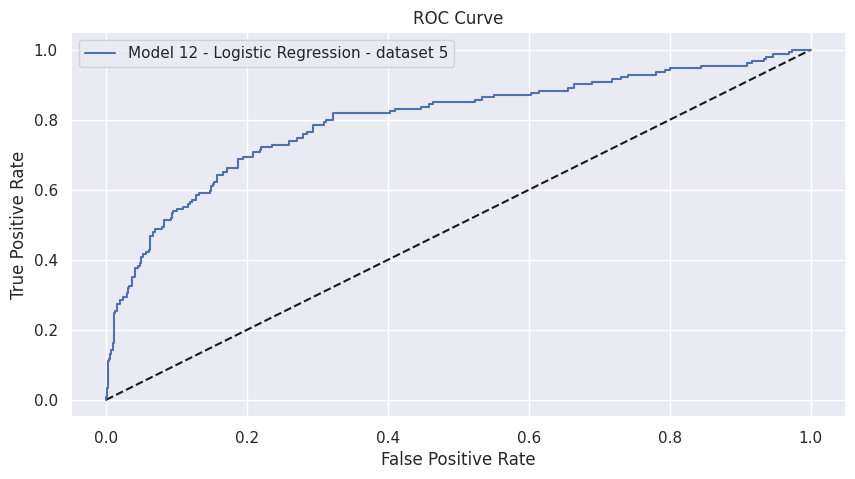

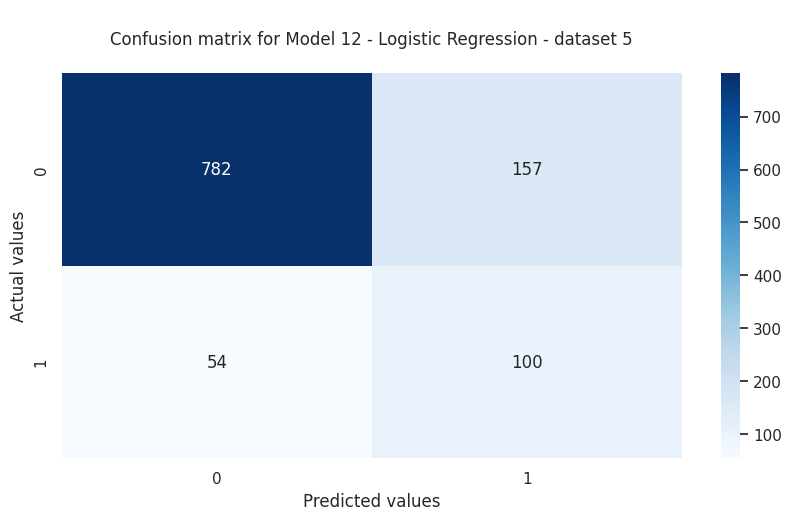

,Model,F1_score,AUC
0,Model 12 - Logistic Regression - dataset 5,0.486618,0.798687


In [200]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(lr_model_5, 'Model 12 - Logistic Regression - dataset 5')

## Model 13 - Support Vector Classifier - zestaw 5

In [201]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

svm_pipeline_5 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_5),
        ('ordinal_transformer', ordinal_transformer, ord_feat_5),
        ('numeric_transformer', numeric_transformer, num_feat_5)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('svm_model_5', svm.SVC(probability=True))
])

In [202]:
svm_param_grid_5 = {
    'smote__sampling_strategy': [0.8],
    'smote__k_neighbors': [5],
    'svm_model_5__C': [0.1],
    'svm_model_5__kernel': ['rbf'],
    'svm_model_5__gamma':  [0.01]
}

In [203]:
svm_search_5 = HalvingGridSearchCV(svm_pipeline_5,
                                 svm_param_grid_5,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

svm_search_5.fit(X_train_5, y_train_5)

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 4368
max_resources_: 4368
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 4368
Fitting 10 folds for each of 1 candidates, totalling 10 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical_transformer',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder())]),
                                                                                ['job',
                                                                                 'marital',
                                                                                 'education',
                                                                                 'housing',
                                                                                 'loan',
                                                                                 'contact',
                                                                                 'poutcome']),
                                                                               ('ordinal_transformer',
                                                                                Pipeline(steps=[('label_encoder',
                                                                                                 <__main__.LabelEncoderTransformer object at 0x7b104d00d780>...
                                                                                 'campaign',
                                                                                 'pdays',
                                                                                 'previous',
                                                                                 'cons.price.idx',
                                                                                 'emp.var.rate'])])),
                                              ('smote', SMOTE(random_state=23)),
                                              ('svm_model_5',
                                               SVC(probability=True))]),
                    n_jobs=-1,
                    param_grid={'smote__k_neighbors': [5],
                                'smote__sampling_strategy': [0.8],
                                'svm_model_5__C': [0.1],
                                'svm_model_5__gamma': [0.01],
                                'svm_model_5__kernel': ['rbf']},
                    random_state=23, scoring='f1_weighted', verbose=1)

In [204]:
print('\nBest hyperparameter:', svm_search_5.best_params_)



Best hyperparameter: {'smote__k_neighbors': 5, 'smote__sampling_strategy': 0.8, 'svm_model_5__C': 0.1, 'svm_model_5__gamma': 0.01, 'svm_model_5__kernel': 'rbf'}


In [205]:
svm_model_5 = svm_search_5.best_estimator_

In [206]:
X_test_data = X_test_5
y_test_data = y_test_5

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       939
           1       0.43      0.58      0.50       154

    accuracy                           0.83      1093
   macro avg       0.68      0.73      0.70      1093
weighted avg       0.86      0.83      0.84      1093



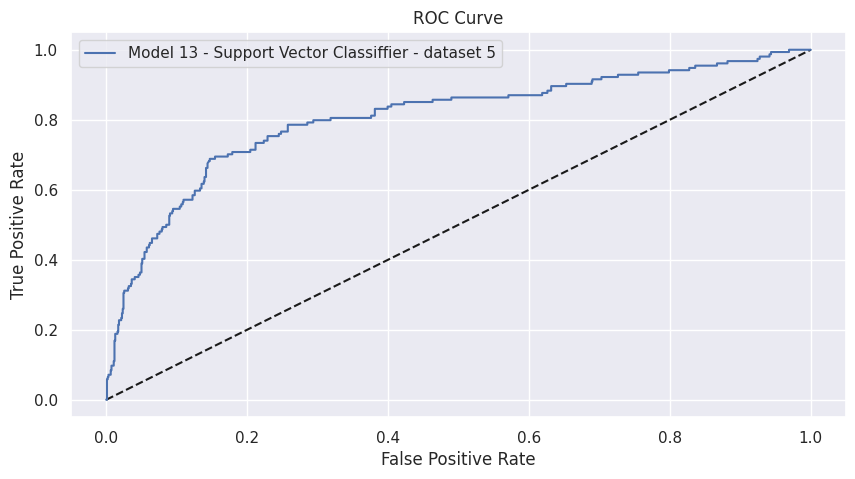

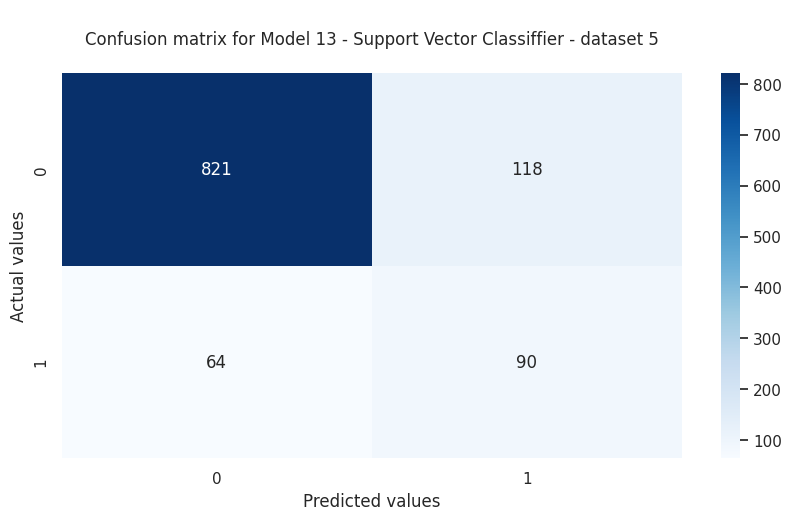

,Model,F1_score,AUC
0,Model 12 - Logistic Regression - dataset 5,0.486618,0.798687
1,Model 13 - Support Vector Classiffier - dataset 5,0.497238,0.806135


In [207]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(svm_model_5, 'Model 13 - Support Vector Classiffier - dataset 5')

## Model 14 - XGBoost() - zestaw 5

In [208]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

xgb_pipeline_5 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_5),
        ('ordinal_transformer', ordinal_transformer, ord_feat_5),
        ('numeric_transformer', numeric_transformer, num_feat_5)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('xgb_model_5', XGBClassifier(verbosity=0))
])


In [209]:
xgb_param_grid_5 = {
    'smote__sampling_strategy': ['all',  ,0.6, 0.8],
    'smote__k_neighbors': [5, 7, 10],
    'xgb_model_5__n_estimators': [50, 100, 150],
    'xgb_model_5__max_depth': [3,6,12],
    'xgb_model_5__learning_rate': [0.1, 0.01, 0.001],
    'xgb_model_5__gamma': [0.01]
}

In [210]:
xgb_search_5 = HalvingGridSearchCV(xgb_pipeline_5,
                                 xgb_param_grid_5,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

xgb_search_5.fit(X_train_5, y_train_5)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 161
max_resources_: 4368
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 161
Fitting 10 folds for each of 27 candidates, totalling 270 fits
----------
iter: 1
n_candidates: 9
n_resources: 483
Fitting 10 folds for each of 9 candidates, totalling 90 fits
----------
iter: 2
n_candidates: 3
n_resources: 1449
Fitting 10 folds for each of 3 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 1
n_resources: 4347
Fitting 10 folds for each of 1 candidates, totalling 10 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical_transformer',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder())]),
                                                                                ['job',
                                                                                 'marital',
                                                                                 'education',
                                                                                 'housing',
                                                                                 'loan',
                                                                                 'contact',
                                                                                 'poutcome']),
                                                                               ('ordinal_transformer',
                                                                                Pipeline(steps=[('label_encoder',
                                                                                                 <__main__.LabelEncoderTransformer object at 0x7b104c0f68f0>...
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))]),
                    n_jobs=-1,
                    param_grid={'smote__k_neighbors': [5],
                                'smote__sampling_strategy': [0.8],
                                'xgb_model_5__gamma': [0.01],
                                'xgb_model_5__learning_rate': [0.1, 0.01,
                                                               0.001],
                                'xgb_model_5__max_depth': [3, 6, 12],
                                'xgb_model_5__n_estimators': [50, 100, 150]},
                    random_state=23, scoring='f1_weighted', verbose=1)

In [211]:
print('\nBest hyperparameters:', xgb_search_5.best_params_)


Best hyperparameters: {'smote__k_neighbors': 5, 'smote__sampling_strategy': 0.8, 'xgb_model_5__gamma': 0.01, 'xgb_model_5__learning_rate': 0.1, 'xgb_model_5__max_depth': 12, 'xgb_model_5__n_estimators': 100}


In [212]:
xgb_model_5 = xgb_search_5.best_estimator_

In [213]:
X_test_data = X_test_5
y_test_data = y_test_5

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       939
           1       0.85      0.68      0.76       154

    accuracy                           0.94      1093
   macro avg       0.90      0.83      0.86      1093
weighted avg       0.94      0.94      0.94      1093



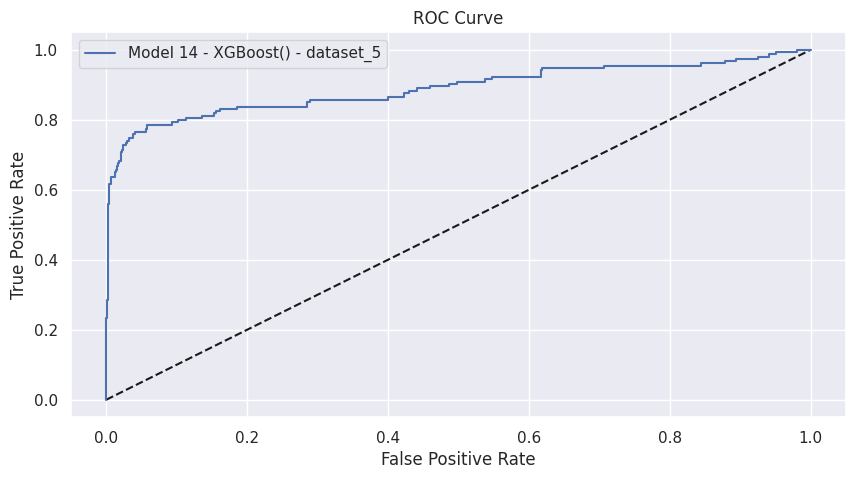

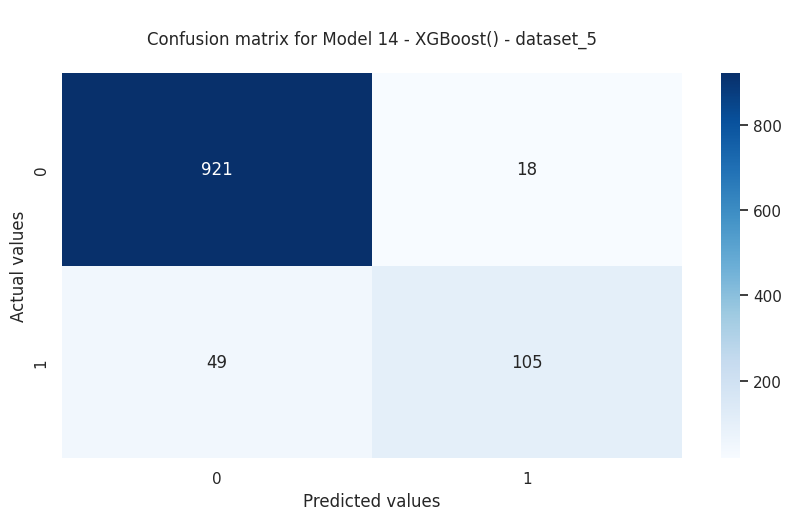

,Model,F1_score,AUC
0,Model 12 - Logistic Regression - dataset 5,0.486618,0.798687
1,Model 13 - Support Vector Classiffier - dataset 5,0.497238,0.806135
2,Model 14 - XGBoost() - dataset_5,0.758123,0.889444


In [214]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(xgb_model_5, 'Model 14 - XGBoost() - dataset_5')

# Wyniki zbiorcze

In [220]:
top_5_auc_models = metrics_dataframe.sort_values(by='AUC', ascending=False).head(5)
top_5_auc_models

,Model,F1_score,AUC
2,Model 14 - XGBoost() - dataset_5,0.758123,0.889444
1,Model 13 - Support Vector Classiffier - dataset 5,0.497238,0.806135
0,Model 12 - Logistic Regression - dataset 5,0.486618,0.798687


In [222]:
# top_5_auc_models.drop(top_5_auc_models.index, inplace=True)

In [223]:
# top_5_auc_models

,Model,F1_score,AUC


In [216]:
stop

NameError: ignored

In [ ]:
models = [lr_model_3, svm_model_3, lr_model_1a, lr_model, svm_model]
model_names = top_5_auc_models['Model']

X_test_data_end = [X_test_3, X_test_3, X_test, X_test, X_test]
y_test_data_end = [y_test_3, y_test_3, y_test, y_test, y_test]

In [ ]:
# plt.figure(figsize=(10, 6))

# for model, model_name, X_test, y_test in zip(models, model_names, X_test_data, y_test_data):
#     predictions_proba = model.predict_proba(X_test)
#     fpr, tpr, _ = roc_curve(y_test, predictions_proba[:, 1])
#     auc_score = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'{model_name} - AUC = {auc_score:.2f}')

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Top 5 models')
# plt.legend()
# plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

for model, model_name, X_testing, y_testing in zip(models, model_names, X_test_data_end, y_test_data_end):
    try:
        predictions_proba = model.predict_proba(X_testing)
        fpr, tpr, _ = roc_curve(y_testing, predictions_proba[:, 1])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} - AUC = {auc_score:.2f}')
    except Exception as e:
        print(f"An error occurred for model {model_name}: {str(e)}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Top 5 models')
plt.legend()
plt.show()

